## 1. EDA 및 전처리

In [2]:
import pandas as pd
import numpy as np

### 파일 csv데이터 불러오기

In [3]:
df_gg = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/물품입찰공고.csv') #물품입찰공고
df_cf = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/물품입찰분류별진행내역.csv') #물품입찰분류별진행내역
df_tc1 = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/투찰업체1.csv') #투찰업체1
df_tc2 = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/투찰업체2.csv') #투찰업체2
df_tc3 = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/투찰업체3.csv') #투찰업체3
df_tc4 = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/투찰업체4.csv') #투찰업체4

C:\Users\moon_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_tc = pd.concat([df_tc1, df_tc2, df_tc3, df_tc4])

물품의 경우, 투찰 업체의 내역이 상당히 많으므로 4번을 나누어 다운로드 하였으므로 하나로 합치는 과정을 가짐.

In [5]:
df_gg_features = df_gg[['입찰공고번호', '정정공고여부', '취소공고여부', '재입찰허용여부', '공동도급협정서접수방식']]
df_cf_features = df_cf[['입찰공고번호', '합계수량', '합계금액', '입찰진행구분', '낙찰자결정여부',
                       '예가방법', '낙찰업체투찰률', '낙찰업체투찰금액','국제입찰여부', '낙찰자결정적용법규']]
df_tc_features = df_tc[['등록유형', '조달구분', '입찰공고번호', '입찰공고차수', '입찰분류번호',
                       '수요기관구분', '수요기관지역명', '품명내용', '긴급공고여부', '추정가격', '배정예산',
                       '입찰서마감일자', '입찰서개시일자', '입찰방식', '기초금액', '예정가격', '참가수',
                       '개찰순위', '입찰률', '입찰금액', '낙찰여부', '낙찰자결정방법', '입찰계약방법',
                       '지역제한내용', '공동도급구성방식명', '조항호코드', '정보화사업여부', '기술평가대행여부',
                       '낙찰하한율']]

df_g2b = pd.merge(df_tc_features, df_cf_features, how='inner', on='입찰공고번호')

df__g2b = pd.merge(df_g2b, df_gg_features, how='inner', on='입찰공고번호')

df__g2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303597 entries, 0 to 303596
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   등록유형         303597 non-null  object 
 1   조달구분         303597 non-null  object 
 2   입찰공고번호       303597 non-null  int64  
 3   입찰공고차수       303597 non-null  int64  
 4   입찰분류번호       303597 non-null  int64  
 5   수요기관구분       303597 non-null  object 
 6   수요기관지역명      303597 non-null  object 
 7   품명내용         303596 non-null  object 
 8   긴급공고여부       289037 non-null  object 
 9   추정가격         302274 non-null  float64
 10  배정예산         301334 non-null  float64
 11  입찰서마감일자      302821 non-null  float64
 12  입찰서개시일자      302821 non-null  float64
 13  입찰방식         303597 non-null  object 
 14  기초금액         182167 non-null  float64
 15  예정가격         302376 non-null  float64
 16  참가수          303597 non-null  int64  
 17  개찰순위         303534 non-null  float64
 18  입찰률          302026 non-

3가지 파일 데이터에서 논의 후, 가격 예측에 유의미할 것이라고 생각되는 변수만 뽑아서 합병하여 전처리를 진행하였다.

In [6]:
df = df__g2b.copy()

### 등록유형

In [7]:
df.등록유형.unique()

array(['나라장터(G2B)'], dtype=object)

In [8]:
df = df.drop(['등록유형'], axis=1)

데이터를 다운로드할 때, 등록유형을 나라장터로 한정지었기 때문에 등록유형을 확인한 후 제거한다.

### 입찰공고차수

In [9]:
df.입찰공고차수.value_counts()

0     280685
1      21702
2        836
4        249
3        116
5          8
10         1
Name: 입찰공고차수, dtype: int64

In [10]:
df.입찰공고차수.value_counts(normalize=True)

0     0.924532
1     0.071483
2     0.002754
4     0.000820
3     0.000382
5     0.000026
10    0.000003
Name: 입찰공고차수, dtype: float64

입찰공고차수가 0~1인 데이터만 해도 99%를 점유한다. 따라서 3위 이상인 것들은 전부 3으로 통합처리한다.

In [11]:
df.loc[df['입찰공고차수']>=4, '입찰공고차수'] = 3

df.입찰공고차수.value_counts(normalize=True)

0    0.924532
1    0.071483
2    0.002754
3    0.001232
Name: 입찰공고차수, dtype: float64

### 수요기관구분

In [12]:
df.수요기관구분.value_counts()

기타공공기관        104465
국가기관           99092
준정부기관          31366
교육기관           18710
지자체            18447
기타기관           14895
지자체 출자출연기관     12404
지방공기업           2156
공기업             2062
Name: 수요기관구분, dtype: int64

따로 전처리 할 필요가 없어보인다.

### 수요기관지역명

In [13]:
df.수요기관지역명.value_counts()

충청북도 청주시 흥덕구    88923
부산광역시 서구        31075
경상남도 창원시 성산구    23817
서울특별시 강동구       18578
경상남도 양산시        16662
                ...  
경기도 부천시 오정구        14
충청남도 천안시            4
경상남도 마산시            1
경기도 안산시             1
경기도 안양시             1
Name: 수요기관지역명, Length: 260, dtype: int64

데이터의 형태가 제각각이므로 00도나 00시로 통일한다.

In [14]:
df['수요기관지역명'] = df['수요기관지역명'].str[:4]

In [15]:
df.loc[df['수요기관지역명'] == '서울특별', '수요기관지역명'] = '서울특별시'
df.loc[df['수요기관지역명'] == '대구광역', '수요기관지역명'] = '대구광역시'
df.loc[df['수요기관지역명'] == '대전광역', '수요기관지역명'] = '대전광역시'
df.loc[df['수요기관지역명'] == '부산광역', '수요기관지역명'] = '부산광역시'
df.loc[df['수요기관지역명'] == '울산광역', '수요기관지역명'] = '울산광역시'
df.loc[df['수요기관지역명'] == '광주광역', '수요기관지역명'] = '광주광역시'
df.loc[df['수요기관지역명'] == '인천광역', '수요기관지역명'] = '인천광역시'
df.loc[df['수요기관지역명'] == '제주특별', '수요기관지역명'] = '제주특별시'
df.loc[df['수요기관지역명'] == '세종특별', '수요기관지역명'] = '세종특별시'

df.수요기관지역명.value_counts()

충청북도     93457
경상남도     56719
서울특별시    44314
부산광역시    38382
대구광역시    15937
경기도      11403
강원도       6971
대전광역시     5610
경상북도      4507
광주광역시     4380
전라북도      4378
전라남도      4006
울산광역시     3507
충청남도      3402
인천광역시     2905
제주특별시     1443
기타지역      1325
세종특별시      951
Name: 수요기관지역명, dtype: int64

### 품명내용

품명내용이 null인 값은 drop하고, 품명내용 괄호 []안에 속해있는 숫자 앞 두글자를 따서 품명대표코드를 만든다.

In [16]:
df = df.dropna(subset=['품명내용'])

과정이 길어지므로 보류하고 아래에서 다시 진행한다.

### 긴급공고여부

In [17]:
df.긴급공고여부.unique()

array(['N', nan, 'Y'], dtype=object)

In [18]:
df.긴급공고여부.value_counts(normalize=True)

N    0.642375
Y    0.357625
Name: 긴급공고여부, dtype: float64

In [19]:
df.긴급공고여부.value_counts()

N    185670
Y    103367
Name: 긴급공고여부, dtype: int64

긴급공고여부가 null인 것들을 대체할 수 없으므로 drop한다.

In [20]:
df = df.dropna(subset=['긴급공고여부'])

### 추정가격, 배정예산

추정가격과 배정예산에 null값이 존재하는데, 이는 대체가 불가능하므로 전부 삭제한다.

In [21]:
df = df.dropna(subset=['추정가격'])
df = df.dropna(subset=['배정예산'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287667 entries, 0 to 303596
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         287667 non-null  object 
 1   입찰공고번호       287667 non-null  int64  
 2   입찰공고차수       287667 non-null  int64  
 3   입찰분류번호       287667 non-null  int64  
 4   수요기관구분       287667 non-null  object 
 5   수요기관지역명      287667 non-null  object 
 6   품명내용         287667 non-null  object 
 7   긴급공고여부       287667 non-null  object 
 8   추정가격         287667 non-null  float64
 9   배정예산         287667 non-null  float64
 10  입찰서마감일자      287021 non-null  float64
 11  입찰서개시일자      287021 non-null  float64
 12  입찰방식         287667 non-null  object 
 13  기초금액         175672 non-null  float64
 14  예정가격         286690 non-null  float64
 15  참가수          287667 non-null  int64  
 16  개찰순위         287609 non-null  float64
 17  입찰률          286355 non-null  float64
 18  입찰금액         287660 non-

### 입찰서 마감일자와 개시일자

입찰서마감일자 - 입찰서개시일자를 계산하여 new column인 ['입찰소요기간']을 제작한다.

null값을 대체할 수 없으므로 drop하고 진행한다.

In [23]:
df = df.dropna(subset=['입찰서마감일자'])
df = df.dropna(subset=['입찰서개시일자'])

과정이 길어지므로 보류하고 아래에서 다시 진행한다.

### 입찰방식

In [24]:
df.입찰방식.unique()

array(['전자입찰', '전자시담', '전자시담(다자간)'], dtype=object)

### 기초금액

금액과 관련된 변수는 null값이 없어야 함. 대체도 불가능. 기초금액의 경우 12만개의 null값이 있으므로 전부 제거한다.

In [25]:
df = df.dropna(subset=['기초금액'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175672 entries, 0 to 303596
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         175672 non-null  object 
 1   입찰공고번호       175672 non-null  int64  
 2   입찰공고차수       175672 non-null  int64  
 3   입찰분류번호       175672 non-null  int64  
 4   수요기관구분       175672 non-null  object 
 5   수요기관지역명      175672 non-null  object 
 6   품명내용         175672 non-null  object 
 7   긴급공고여부       175672 non-null  object 
 8   추정가격         175672 non-null  float64
 9   배정예산         175672 non-null  float64
 10  입찰서마감일자      175672 non-null  float64
 11  입찰서개시일자      175672 non-null  float64
 12  입찰방식         175672 non-null  object 
 13  기초금액         175672 non-null  float64
 14  예정가격         175672 non-null  float64
 15  참가수          175672 non-null  int64  
 16  개찰순위         175654 non-null  float64
 17  입찰률          175665 non-null  float64
 18  입찰금액         175665 non-

In [26]:
pd.options.display.float_format = '{:.5f}'.format

In [27]:
df.기초금액.describe()

count         175672.00000
mean        49391961.65767
std        586948688.20485
min                4.70000
25%           126170.00000
50%           715000.00000
75%         23199000.00000
max     171901000000.00000
Name: 기초금액, dtype: float64

이상치를 제거하려고 했으나 기초금액 보다는 낙찰업체투찰금액에서 제거하는 것이 더 낫다고 판단하여 보류한다.

### 낙찰업체투찰금액과 낙찰업체투찰률

여러번 drop을 진행했음에도 main column이 되는 낙찰업체투찰금액에 null값이 존재하여 해당 두 변수에 먼저 null drop한다.

In [28]:
df = df.dropna(subset=['낙찰업체투찰률'])
df = df.dropna(subset=['낙찰업체투찰금액'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161053 entries, 0 to 303596
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         161053 non-null  object 
 1   입찰공고번호       161053 non-null  int64  
 2   입찰공고차수       161053 non-null  int64  
 3   입찰분류번호       161053 non-null  int64  
 4   수요기관구분       161053 non-null  object 
 5   수요기관지역명      161053 non-null  object 
 6   품명내용         161053 non-null  object 
 7   긴급공고여부       161053 non-null  object 
 8   추정가격         161053 non-null  float64
 9   배정예산         161053 non-null  float64
 10  입찰서마감일자      161053 non-null  float64
 11  입찰서개시일자      161053 non-null  float64
 12  입찰방식         161053 non-null  object 
 13  기초금액         161053 non-null  float64
 14  예정가격         161053 non-null  float64
 15  참가수          161053 non-null  int64  
 16  개찰순위         161035 non-null  float64
 17  입찰률          161046 non-null  float64
 18  입찰금액         161046 non-

In [29]:
df['낙찰업체투찰금액'].describe()

count         161053.00000
mean        38831284.37281
std        480817936.52851
min                0.00000
25%            67210.00000
50%           370524.00000
75%         13443100.00000
max     138860000000.00000
Name: 낙찰업체투찰금액, dtype: float64

낙찰업체투찰금액이 0원인 데이터는 사용이 불가하므로 0인 금액을 제거한다.

In [30]:
df_copy1 = df.copy()
df_copy1 = df_copy1[df_copy1['낙찰업체투찰금액'] != 0]
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151603 entries, 0 to 303596
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         151603 non-null  object 
 1   입찰공고번호       151603 non-null  int64  
 2   입찰공고차수       151603 non-null  int64  
 3   입찰분류번호       151603 non-null  int64  
 4   수요기관구분       151603 non-null  object 
 5   수요기관지역명      151603 non-null  object 
 6   품명내용         151603 non-null  object 
 7   긴급공고여부       151603 non-null  object 
 8   추정가격         151603 non-null  float64
 9   배정예산         151603 non-null  float64
 10  입찰서마감일자      151603 non-null  float64
 11  입찰서개시일자      151603 non-null  float64
 12  입찰방식         151603 non-null  object 
 13  기초금액         151603 non-null  float64
 14  예정가격         151603 non-null  float64
 15  참가수          151603 non-null  int64  
 16  개찰순위         151585 non-null  float64
 17  입찰률          151596 non-null  float64
 18  입찰금액         151596 non-

In [31]:
df1 = df_copy1.copy()
df1['낙찰업체투찰금액'].describe()

count         151603.00000
mean        41251788.17104
std        495476377.72784
min                2.70000
25%            93500.00000
50%           495140.00000
75%         17601142.00000
max     138860000000.00000
Name: 낙찰업체투찰금액, dtype: float64

가격의 편차가 너무 심하므로 이상치를 제거한다.

In [32]:
Q1 = np.percentile(df1['낙찰업체투찰금액'].values, 25)
Q3 = np.percentile(df1['낙찰업체투찰금액'].values, 75)

IQR = Q3-Q1

df1 = df1[(df1['낙찰업체투찰금액'] >= (Q1 - (1.5*IQR))) & (df1['낙찰업체투찰금액'] <= (Q3 + (1.5*IQR)))]

In [33]:
df1['낙찰업체투찰금액'].describe()

count     130651.00000
mean     4888983.17638
std     10341368.90391
min            2.70000
25%        76945.00000
50%       296994.00000
75%      1421752.00000
max     43862000.00000
Name: 낙찰업체투찰금액, dtype: float64

### 조항호코드, 정보화사업여부, 합계금액

In [34]:
df1['조항호코드'].value_counts()

01702000-20101022     18
00201010-20130506     14
01001000-20101022      5
02101080-20101022      4
01803000-20101022      1
00201020-20130506      1
02101030-20101022      1
0260105가3-20210706     1
Name: 조항호코드, dtype: int64

In [35]:
df1['정보화사업여부'].value_counts()

N    45
Name: 정보화사업여부, dtype: int64

조항호코드와 정보화사업여부, 합계금액는 13만개의 데이터중 815개의 데이터만 존재하므로 사용할 수 없을 것으로 판단했다.

계속하여 len이 0인 기술평가대행여부도 삭제처리한다.

In [36]:
df1.drop(['조항호코드', '정보화사업여부', '기술평가대행여부', '합계금액'], axis=1, inplace=True)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130651 entries, 0 to 303593
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         130651 non-null  object 
 1   입찰공고번호       130651 non-null  int64  
 2   입찰공고차수       130651 non-null  int64  
 3   입찰분류번호       130651 non-null  int64  
 4   수요기관구분       130651 non-null  object 
 5   수요기관지역명      130651 non-null  object 
 6   품명내용         130651 non-null  object 
 7   긴급공고여부       130651 non-null  object 
 8   추정가격         130651 non-null  float64
 9   배정예산         130651 non-null  float64
 10  입찰서마감일자      130651 non-null  float64
 11  입찰서개시일자      130651 non-null  float64
 12  입찰방식         130651 non-null  object 
 13  기초금액         130651 non-null  float64
 14  예정가격         130651 non-null  float64
 15  참가수          130651 non-null  int64  
 16  개찰순위         130639 non-null  float64
 17  입찰률          130648 non-null  float64
 18  입찰금액         130648 non-

### 낙찰하한율

In [38]:
!pip install IPython
from IPython.display import Image

You should consider upgrading via the 'C:\Users\moon_\anaconda3\python.exe -m pip install --upgrade pip' command.


In [39]:
df1['낙찰하한율'].isna().sum() #낙찰하한율 대체 전

6105

낙찰하한율의 대체가 가능한 null 값들은 대체한다.

In [40]:
df1[(df1['낙찰자결정방법'].isna()==True) & (df1['낙찰하한율'].isna()==False)][['낙찰자결정방법', '낙찰하한율']]

,낙찰자결정방법,낙찰하한율
332,NaN,88.00000
546,NaN,87.99500
31555,NaN,88.00000
44904,NaN,87.99500
67581,NaN,87.99500
81650,NaN,87.99500
82292,NaN,90.00000
82694,NaN,87.99500
83590,NaN,87.99500
83608,NaN,88.00000


In [41]:
len(df1[(df1['낙찰자결정방법'].isna()==True) & (df1['낙찰하한율'].isna()==False)][['낙찰자결정방법', '낙찰하한율']])

39

In [42]:
df1['낙찰자결정방법'].fillna('확인불가', inplace=True)

낙찰자결정방법을 통해 낙찰하한율을 찾기 위해서 낙찰자결정방법의 결측치를 '확인불가'로 대체한다.

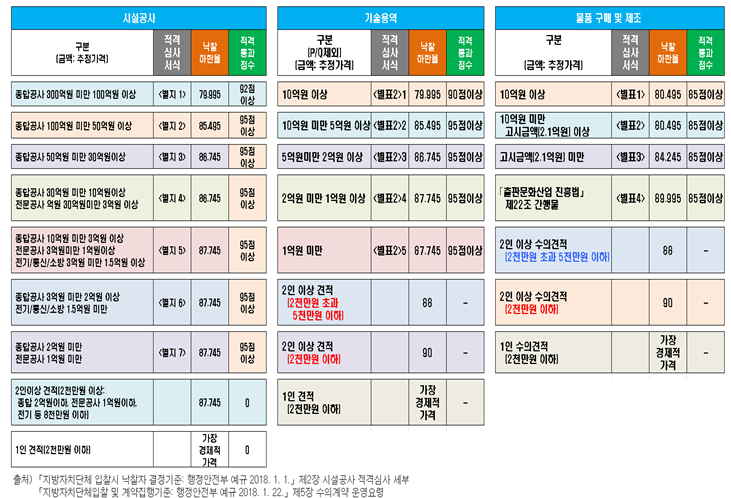

In [43]:
Image('C:/Users/moon_/OneDrive - konkuk.ac.kr/바탕 화면/조달청 공모전/image.png')

In [44]:
df1.loc[df1['낙찰자결정방법'].str.contains('10억이상'), '낙찰하한율'] = 80.495
df1.loc[df1['낙찰자결정방법'].str.contains('10억원이상'), '낙찰하한율'] = 80.495

df1.loc[df1['낙찰자결정방법'].str.contains('10억원미만'), '낙찰하한율'] = 80.495
df1.loc[df1['낙찰자결정방법'].str.contains('10억미만'), '낙찰하한율'] = 80.495

df1.loc[df1['낙찰자결정방법'].str.contains('고시금액미만'), '낙찰하한율'] = 84.245
df1.loc[df1['낙찰자결정방법'].str.contains('고시금액 미만'), '낙찰하한율'] = 84.245

df1.loc[df1['낙찰자결정방법'].str.contains('간행물'), '낙찰하한율'] = 89.995 

In [45]:
df1['낙찰하한율'].isna().sum() #낙찰하한율 대체 후

6093

In [46]:
df1['낙찰하한율'].value_counts()

84.24500    94617
88.00000    17134
90.00000     9879
80.49500     2582
87.74500      143
87.99500       88
95.00000       54
87.94500       17
80.50000       11
89.99500       10
91.00000        6
2.00000         3
85.00000        2
3.00000         2
84.24000        1
0.30000         1
87.00000        1
84.25000        1
50.00000        1
93.00000        1
84.27500        1
87.24500        1
94.25000        1
85.24500        1
Name: 낙찰하한율, dtype: int64

낙찰하한율이 2, 0.3, 3 처럼 말이 되지 않는 값을 가지는 경우가 존재한다. 물품의 최저 낙찰하한율의 소수점을 버린 79 이상의 data만 남기도록 하고 그 이하의 낙찰하한율을 가지는 데이터는 제거한다.

In [47]:
df1 = df1.dropna(subset=['낙찰하한율'])
df1 = df1[df1['낙찰하한율'] >= 79]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124551 entries, 0 to 303593
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124551 non-null  object 
 1   입찰공고번호       124551 non-null  int64  
 2   입찰공고차수       124551 non-null  int64  
 3   입찰분류번호       124551 non-null  int64  
 4   수요기관구분       124551 non-null  object 
 5   수요기관지역명      124551 non-null  object 
 6   품명내용         124551 non-null  object 
 7   긴급공고여부       124551 non-null  object 
 8   추정가격         124551 non-null  float64
 9   배정예산         124551 non-null  float64
 10  입찰서마감일자      124551 non-null  float64
 11  입찰서개시일자      124551 non-null  float64
 12  입찰방식         124551 non-null  object 
 13  기초금액         124551 non-null  float64
 14  예정가격         124551 non-null  float64
 15  참가수          124551 non-null  int64  
 16  개찰순위         124542 non-null  float64
 17  입찰률          124549 non-null  float64
 18  입찰금액         124549 non-

In [48]:
df2 = df1.copy()

### 입찰률, 입찰금액

##### 입찰률 = (입찰금액/예정가격)*100으로 null값 대체한다.
##### 입찰금액 null drop을 먼저 진행한다.

In [49]:
df2 = df2.dropna(subset=['입찰금액'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124549 entries, 0 to 303593
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124549 non-null  object 
 1   입찰공고번호       124549 non-null  int64  
 2   입찰공고차수       124549 non-null  int64  
 3   입찰분류번호       124549 non-null  int64  
 4   수요기관구분       124549 non-null  object 
 5   수요기관지역명      124549 non-null  object 
 6   품명내용         124549 non-null  object 
 7   긴급공고여부       124549 non-null  object 
 8   추정가격         124549 non-null  float64
 9   배정예산         124549 non-null  float64
 10  입찰서마감일자      124549 non-null  float64
 11  입찰서개시일자      124549 non-null  float64
 12  입찰방식         124549 non-null  object 
 13  기초금액         124549 non-null  float64
 14  예정가격         124549 non-null  float64
 15  참가수          124549 non-null  int64  
 16  개찰순위         124542 non-null  float64
 17  입찰률          124549 non-null  float64
 18  입찰금액         124549 non-

In [50]:
df2[df2['입찰률'].isna()]

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,...,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식


입찰금액이 null값인 것들을 drop했더니 입찰률이 null인 값은 존재하지 않았다.

### 개찰순위

In [51]:
df2.개찰순위.value_counts()

1.00000      120945
2.00000        1628
3.00000         571
4.00000         392
5.00000         174
              ...  
171.00000         1
125.00000         1
88.00000          1
68.00000          1
277.00000         1
Name: 개찰순위, Length: 120, dtype: int64

In [52]:
df2.개찰순위.value_counts(normalize=True)

1.00000     0.97112
2.00000     0.01307
3.00000     0.00458
4.00000     0.00315
5.00000     0.00140
              ...  
171.00000   0.00001
125.00000   0.00001
88.00000    0.00001
68.00000    0.00001
277.00000   0.00001
Name: 개찰순위, Length: 120, dtype: float64

개찰순위 또한 3위 이후로는 1%도 점유하지 못함. 3 이상의 순위들은 전부 3으로 통합

In [53]:
df2 = df2.dropna(subset=['개찰순위'])

df2.loc[df2['개찰순위']>=4, '개찰순위'] = 3

df2.개찰순위.value_counts(normalize=True)

1.00000   0.97112
3.00000   0.01581
2.00000   0.01307
Name: 개찰순위, dtype: float64

### 낙찰자결정방법

In [54]:
df2.낙찰자결정방법.unique()

array(['제한적최저가(낙찰하한율)', '적격심사(추정가격 고시금액미만)',
       '적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)', '적격심사에의한 최저가낙찰자 결정(낙찰하한율)',
       '적격심사(추정가격 고시금액이상 10억원 미만)', '확인불가',
       '중기간 경쟁물품 계약이행능력심사(조달청 공고-추정가격 고시금액미만)',
       '적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)',
       '중기간 경쟁물품 계약이행능력심사(중기부 공고-추정가격 10억미만 고시금액 이상)',
       '중기간 경쟁물품 계약이행능력심사(중기부 공고-추정가격 고시금액 미만)', '적격심사(추정가격 10억원이상)',
       '적격심사(추정가격 10억원이상 제조입찰)', '희망수량경쟁(제한최저)',
       '적격심사(출판문화산업진흥법에 따른 간행물)',
       '중기간 경쟁물품 계약이행능력심사(조달청 공고-추정가격 10억미만 5억이상)'], dtype=object)

In [55]:
df2.낙찰자결정방법.value_counts()

적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)              91468
제한적최저가(낙찰하한율)                                   27349
적격심사(추정가격 고시금액미만)                                2042
적격심사(추정가격 고시금액이상 10억원 미만)                        1261
적격심사에의한 최저가낙찰자 결정(낙찰하한율)                          777
적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)         745
적격심사(추정가격 10억원이상)                                 445
중기간 경쟁물품 계약이행능력심사(중기부 공고-추정가격 고시금액 미만)            174
중기간 경쟁물품 계약이행능력심사(조달청 공고-추정가격 고시금액미만)             153
확인불가                                               39
적격심사(추정가격 10억원이상 제조입찰)                             36
중기간 경쟁물품 계약이행능력심사(중기부 공고-추정가격 10억미만 고시금액 이상)       29
희망수량경쟁(제한최저)                                       15
적격심사(출판문화산업진흥법에 따른 간행물)                             8
중기간 경쟁물품 계약이행능력심사(조달청 공고-추정가격 10억미만 5억이상)           1
Name: 낙찰자결정방법, dtype: int64

낙찰자 결정방법에는 크게 다음과 같이 정리할 수 있음

최저가낙찰제, 적격심사낙찰제, 종합평가낙찰제, 2단계경쟁입찰, 협상에의한계약

적격심사라는 단어가 들어가는 것들은 적격심사낙찰제, 최저가라는 단어가 들어가는 것들은 최저가낙찰제로 변경 후 다시 value_counts() 처리

In [56]:
df2 = df2.dropna(subset=['낙찰자결정방법'])

df2.loc[df2['낙찰자결정방법'].str.contains('최저가'), '낙찰자결정방법'] = '최저가낙찰제'
df2.loc[df2['낙찰자결정방법'].str.contains('적격심사'), '낙찰자결정방법'] = '적격심사낙찰제'
df2.loc[df2['낙찰자결정방법'].str.contains('계약이행능력심사'), '낙찰자결정방법'] = '계약이행능력심사'
df2.loc[df2['낙찰자결정방법'].str.contains('희망수량경쟁'), '낙찰자결정방법'] = '희망수량경쟁'

In [57]:
df2.낙찰자결정방법.value_counts()

적격심사낙찰제     96005
최저가낙찰제      28126
계약이행능력심사      357
확인불가           39
희망수량경쟁         15
Name: 낙찰자결정방법, dtype: int64

### 지역제한내용

In [58]:
df2.지역제한내용.unique()

array(['경기도 시흥시[41390]', nan, '부산광역시[26000]',
       '경상북도 김천시[47150], 경상북도 구미시[47190]', '경기도[41000]',
       '충청남도 서산시[44210]', '경상북도 안동시[47170]', '대구광역시[27000]',
       '광주광역시[29000]', '대전광역시[30000]', '전라남도[46000], 광주광역시[29000]',
       '서울특별시[11000], 경기도[41000]', '전라북도[45000]', '전라북도 전주시[45110]',
       '강원도 화천군[42790]', '경상남도 진주시[48170]',
       '경상북도 경주시[47130], 경상북도 포항시[47110]', '전라남도[46000]',
       '전라북도 정읍시[45180]', '충청남도[44000]', '경상북도[47000]', '세종특별자치시[36000]',
       '경기도[41000], 서울특별시[11000]', '서울특별시[11000]', '강원도 정선군[42770]',
       '경상남도 밀양시[48270]', '광주광역시[29000], 전라남도[46000]', '제주특별자치도[50000]',
       '경상남도[48000]', '충청북도 청주시[43110]',
       '서울특별시[11000], 인천광역시[28000], 경기도[41000]', '경상북도 구미시[47190]',
       '충청남도 논산시[44230]', '충청남도 홍성군[44800]', '인천광역시[28000]',
       '전라북도 남원시[45190]', '충청남도 천안시[44130]',
       '인천광역시[28000], 서울특별시[11000], 경기도[41000]', '경기도 김포시[41570]',
       '경상북도 경산시[47290]', '경상북도 예천군[47900]',
       '경기도 동두천시[41250], 경기도 양주시[41630], 경기도 의정부시[4115

In [59]:
df2.지역제한내용.value_counts()

대구광역시[27000]                                                                        4592
울산광역시[31000]                                                                        2466
서울특별시[11000]                                                                        1125
부산광역시[26000]                                                                        1008
전라북도[45000]                                                                         1003
                                                                                    ... 
충청남도 공주시[44150], 충청남도 천안시[44130]                                                       1
경기도 동두천시[41250], 경기도 양주시[41630], 경기도 의정부시[41150], 경기도 포천시[41650], 경기도 연천군[41800]       1
경상남도 산청군[48860], 경상남도 진주시[48170], 경상남도 함양군[48870]                                      1
전라남도[46000], 광주광역시[29000], 전라북도[45000]                                                 1
전라남도 여수시[46130], 전라남도 순천시[46150], 전라남도 광양시[46230]                                      1
Name: 지역제한내용, Length:

In [60]:
df2[df2['지역제한내용'].isna()]

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,...,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식
17,자체조달,20211032984,0,1,교육기관,경상남도,차양[30151901],N,47745000.00000,52519500.00000,...,Y,복수예가,88.32600,87620.00000,N,지방계약법,N,N,Y,일반(중앙)
24,자체조달,20211033596,0,1,준정부기관,대구광역시,대기오염측정기[41113199],N,42985000.00000,47283500.00000,...,Y,복수예가,88.38200,42053320.00000,N,국가계약법,N,N,Y,일반(중앙)
44,자체조달,20211034674,1,1,기타기관,경상남도,DB관리시스템소프트웨어[43232304],N,26040000.00000,28644000.00000,...,Y,복수예가,99.32800,28050000.00000,N,국가계약법,Y,N,N,일반(중앙)
66,자체조달,20211035302,0,1,교육기관,광주광역시,굴곡성또는횡성검사기[41114623],N,27818181.00000,30600000.00000,...,Y,복수예가,97.97900,29685000.00000,N,지방계약법,N,N,Y,일반(중앙)
80,자체조달,20211035456,0,1,기타기관,광주광역시,컴퓨터서버[43211501],N,7200000.00000,7920000.00000,...,Y,복수예가,99.63100,7865000.00000,N,국가계약법,N,N,Y,일반(중앙)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303445,자체조달,20211033772,0,1,지자체,서울특별시,탈취제[47131816],N,21800000.00000,23980000.00000,...,Y,복수예가,88.00000,21003420.00000,N,지방계약법,N,N,Y,일반(중앙)
303473,자체조달,20211033981,0,1,기타기관,경상남도,금속제창[30171698],N,508467419.00000,559314161.00000,...,Y,복수예가,88.61600,87797.00000,N,지방계약법,N,N,Y,일반(중앙)
303496,자체조달,20211034266,0,1,지자체,대전광역시,바코드라벨[55121608],N,20599000.00000,22658900.00000,...,Y,복수예가,95.49700,21541040.00000,N,지방계약법,N,N,Y,일반(중앙)
303518,자체조달,20211034477,0,1,교육기관,경상남도,엘리베이터[24101601],N,47272727.00000,52000000.00000,...,Y,복수예가,89.17400,88149.00000,N,지방계약법,N,N,Y,일반(중앙)


이 또한 형태가 다양하고 어느 하나의 값으로 대체가 불가능하므로, 지역제한여부라는 column을 생성하여서 지역제한내용이 있다면 Y, 없다면 N로 표기함

In [61]:
df2['지역제한여부'] = 'Y'

df2.loc[df2['지역제한내용'].isna(), '지역제한여부'] = 'N'

In [62]:
df2.지역제한여부.value_counts()

N    99600
Y    24942
Name: 지역제한여부, dtype: int64

In [63]:
df2.drop(['지역제한내용'], axis=1, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124542 entries, 0 to 303593
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124542 non-null  object 
 1   입찰공고번호       124542 non-null  int64  
 2   입찰공고차수       124542 non-null  int64  
 3   입찰분류번호       124542 non-null  int64  
 4   수요기관구분       124542 non-null  object 
 5   수요기관지역명      124542 non-null  object 
 6   품명내용         124542 non-null  object 
 7   긴급공고여부       124542 non-null  object 
 8   추정가격         124542 non-null  float64
 9   배정예산         124542 non-null  float64
 10  입찰서마감일자      124542 non-null  float64
 11  입찰서개시일자      124542 non-null  float64
 12  입찰방식         124542 non-null  object 
 13  기초금액         124542 non-null  float64
 14  예정가격         124542 non-null  float64
 15  참가수          124542 non-null  int64  
 16  개찰순위         124542 non-null  float64
 17  입찰률          124542 non-null  float64
 18  입찰금액         124542 non-

### 공동도급구성방식명

In [64]:
df2.공동도급구성방식명.unique()

array(['공동수급불허', '공동이행', nan, '공동+분담이행', '분담이행'], dtype=object)

In [65]:
df2.공동도급구성방식명.value_counts()

공동수급불허     124410
분담이행           75
공동이행           43
공동+분담이행         2
Name: 공동도급구성방식명, dtype: int64

In [66]:
df2[df2.공동도급구성방식명.isna()]

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,...,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한여부
2448,중앙조달,20211109317,0,1,기타공공기관,충청남도,산업용로봇[23153298],Y,37000000.00000,41230000.00000,...,복수예가,88.00500,34786700.00000,N,국가계약법,N,N,Y,일반(중앙),Y
4466,중앙조달,20211111460,0,1,준정부기관,강원도,"래미네이션필름[44102001], 프린터리본[44103112]",Y,940254545.00000,1042354540.00000,...,복수예가,80.88900,405240.00000,N,국가계약법,N,N,Y,일반(중앙),N
30867,중앙조달,20211122840,0,1,국가기관,강원도,헬륨가스[12142005],Y,276950000.00000,307270300.00000,...,복수예가,80.54700,2746780.00000,N,국가계약법,N,N,Y,일반(중앙),N
139735,중앙조달,20210723346,0,1,준정부기관,강원도,통장[55101529],Y,54524364.00000,60618550.00000,...,복수예가,88.26900,438.00000,N,국가계약법,N,N,Y,일반(중앙),N
143831,중앙조달,20210212699,0,1,준정부기관,강원도,"기타인쇄물[55101599], 프린터라벨[55121612]",Y,146083324.00000,162222906.00000,...,복수예가,88.00400,11327.87000,N,국가계약법,N,N,Y,일반(중앙),N
254821,중앙조달,20210403337,0,1,국가기관,경상북도,모자[53102503],Y,229825455.00000,260000000.00000,...,복수예가,80.53900,18930.50000,N,국가계약법,N,N,Y,일반(중앙),N
261281,중앙조달,20210411617,0,1,준정부기관,충청북도,화상회의소프트웨어[43233502],Y,108238500.00000,120277220.00000,...,복수예가,98.35600,19000.00000,N,국가계약법,N,N,Y,일반(중앙),N
261490,중앙조달,20210409863,0,1,준정부기관,강원도,스마트카드[32101617],Y,728618182.00000,807881240.00000,...,복수예가,80.60000,338.08000,N,국가계약법,N,N,Y,일반(중앙),N
263494,중앙조달,20210341389,0,1,국가기관,대전광역시,허리띠또는멜빵[53102501],Y,194154357.00000,215116293.00000,...,복수예가,88.07800,7207.20000,N,국가계약법,N,N,Y,일반(중앙),N
266675,중앙조달,20210433368,0,1,지자체,서울특별시,콘크리트관[40142109],Y,56869636.00000,63225950.00000,...,복수예가,84.86800,42010000.00000,N,지방계약법,N,N,Y,일반(중앙),N


In [67]:
df2.공동도급구성방식명.value_counts(normalize=True)

공동수급불허    0.99904
분담이행      0.00060
공동이행      0.00035
공동+분담이행   0.00002
Name: 공동도급구성방식명, dtype: float64

공동도급구성방식명이 없다는 뜻은, 불허한다는 뜻으로 간주한다.

In [68]:
df2.loc[df2['공동도급구성방식명'].isna(), '공동도급구성방식명'] = '공동수급불허'

df2['공동도급구성방식명'].value_counts()

공동수급불허     124422
분담이행           75
공동이행           43
공동+분담이행         2
Name: 공동도급구성방식명, dtype: int64

### 낙찰자결정적용법규

In [69]:
df2['낙찰자결정적용법규'].unique()

array(['지방계약법', '국가계약법', nan], dtype=object)

In [70]:
df2['낙찰자결정적용법규'].value_counts()

국가계약법    98886
지방계약법    25220
Name: 낙찰자결정적용법규, dtype: int64

In [71]:
df2 = df2.dropna(subset=['낙찰자결정적용법규'])

대체할 값을 찾지 못하여서 drop처리한다.

### 공동도급협정서접수방식

In [72]:
df2['공동도급협정서접수방식'].value_counts()

일반(중앙)    123991
공동(중앙)       114
Name: 공동도급협정서접수방식, dtype: int64

In [73]:
df2[df2['공동도급협정서접수방식'].isna()]

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,...,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한여부
289794,자체조달,20210917082,0,1,준정부기관,전라남도,하드디스크어레이[43201802],N,30963636.00000,34060000.00000,...,복수예가,84.26700,28810000.00000,N,국가계약법,N,N,N,NaN,N


In [74]:
df2 = df2.dropna(subset=['공동도급협정서접수방식'])

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124105 entries, 0 to 303593
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124105 non-null  object 
 1   입찰공고번호       124105 non-null  int64  
 2   입찰공고차수       124105 non-null  int64  
 3   입찰분류번호       124105 non-null  int64  
 4   수요기관구분       124105 non-null  object 
 5   수요기관지역명      124105 non-null  object 
 6   품명내용         124105 non-null  object 
 7   긴급공고여부       124105 non-null  object 
 8   추정가격         124105 non-null  float64
 9   배정예산         124105 non-null  float64
 10  입찰서마감일자      124105 non-null  float64
 11  입찰서개시일자      124105 non-null  float64
 12  입찰방식         124105 non-null  object 
 13  기초금액         124105 non-null  float64
 14  예정가격         124105 non-null  float64
 15  참가수          124105 non-null  int64  
 16  개찰순위         124105 non-null  float64
 17  입찰률          124105 non-null  float64
 18  입찰금액         124105 non-

결측치를 모두 해결하였다. 위에서 보류한 것들과 데이터가 잘 정리되었는지 점검한다.

In [76]:
clean_df = df2.copy()

In [77]:
print(clean_df['조달구분'].unique())
print(clean_df['조달구분'].value_counts())

['자체조달' '중앙조달']
자체조달    124092
중앙조달        13
Name: 조달구분, dtype: int64


중앙조달이 자체조달에 비해 매우 점유율이 낮으므로 중앙조달은 모델링에 사용하지 않는다. (오류의 위험성)

In [78]:
clean_df = clean_df[clean_df['조달구분']=='자체조달']

In [79]:
print(clean_df['입찰공고차수'].unique())
print(clean_df['입찰공고차수'].value_counts())

[0 1 3 2]
0    121236
1      2126
2       459
3       271
Name: 입찰공고차수, dtype: int64


In [80]:
clean_df['입찰분류번호'].value_counts(normalize=True)

1     0.22610
2     0.00669
3     0.00621
4     0.00595
5     0.00582
        ...  
255   0.00225
117   0.00026
288   0.00016
300   0.00016
282   0.00010
Name: 입찰분류번호, Length: 283, dtype: float64

통합하기에는 무리가 있다고 판단했다.

In [81]:
print(clean_df['수요기관구분'].unique())
print(clean_df['수요기관구분'].value_counts())

['교육기관' '준정부기관' '지자체' '기타기관' '지자체 출자출연기관' '지방공기업' '기타공공기관' '국가기관' '공기업']
국가기관          91099
교육기관          11746
지자체            6249
기타기관           4904
지자체 출자출연기관     3845
준정부기관          3071
기타공공기관         2081
지방공기업           956
공기업             141
Name: 수요기관구분, dtype: int64


In [82]:
print(clean_df['수요기관지역명'].unique())
print(clean_df['수요기관지역명'].value_counts())

['경기도 ' '경상남도' '대구광역시' '부산광역시' '경상북도' '충청남도' '광주광역시' '대전광역시' '전라남도'
 '서울특별시' '전라북도' '강원도 ' '충청북도' '세종특별시' '인천광역시' '제주특별시' '울산광역시']
충청북도     90358
서울특별시     7501
대구광역시     4941
경기도       2730
울산광역시     2560
경상남도      2193
경상북도      1906
강원도       1676
전라북도      1639
전라남도      1574
충청남도      1481
부산광역시     1374
광주광역시     1372
대전광역시     1164
인천광역시      864
제주특별시      453
세종특별시      306
Name: 수요기관지역명, dtype: int64


In [83]:
print(clean_df['긴급공고여부'].unique())
print(clean_df['긴급공고여부'].value_counts())

['N' 'Y']
Y    91244
N    32848
Name: 긴급공고여부, dtype: int64


In [84]:
print(clean_df['입찰방식'].unique())
print(clean_df['입찰방식'].value_counts())

['전자입찰' '전자시담(다자간)']
전자입찰         124072
전자시담(다자간)        20
Name: 입찰방식, dtype: int64


In [85]:
print(clean_df['참가수'].unique())
print(clean_df['참가수'].value_counts())

[   9    4  202   11 1109    5   31  127  110    2   21   47   55  106
    8   18   33  200  169   37   16    6    3   12   90  166    7   40
   23  696   10  625   89   87   78  194  185   71   70   95   51   14
  175  306   59  154   35   46  817   20   22 4059 1219  107  155   76
   34   79  171   36  402    1   61   15   83  132 2702 1190   81 2711
  136  135   26   30  170   17  516  289   29  182   65   75   97  234
   53   13   45 4202   42   28   67  104   27  813  109   72  318  139
   64 3608   56   39   32  138  100 1329  119   68  248  243   25   24
  216  120  287  756 3026   66   48  129   96  495  533  218  565   62
   54   84   85   86   19  102   98   63   41  143  195  122  115   69
  108  131  291   57   49  167   73  713  152  151  146  274  189   43
  693  203  198  219  226   44  294   92   58  374  103  351  844  233
  158   93 1319  290  147  105  463  223  149  419   38 1000   77  150
  201  275  163  101  270  159   88  116   52  376  164   80  162  165
   91 

In [86]:
print(clean_df['개찰순위'].unique())
print(clean_df['개찰순위'].value_counts())

[1. 3. 2.]
1.00000    120531
3.00000      1952
2.00000      1609
Name: 개찰순위, dtype: int64


In [87]:
print(clean_df['입찰률'].unique())
print(clean_df['입찰률'].value_counts())

[90.082 88.326 88.382 ... 95.497 98.862 93.21 ]
84.24500    2289
84.25100    2180
84.26800    1818
84.26100    1813
84.24900    1780
            ... 
91.02300       1
98.98800       1
84.42900       1
84.57100       1
96.00000       1
Name: 입찰률, Length: 7798, dtype: int64


In [88]:
print(clean_df['낙찰여부'].unique())
print(clean_df['낙찰여부'].value_counts())

['Y']
Y    124092
Name: 낙찰여부, dtype: int64


In [89]:
print(clean_df['낙찰자결정방법'].unique())
print(clean_df['낙찰자결정방법'].value_counts())

['최저가낙찰제' '적격심사낙찰제' '확인불가' '계약이행능력심사' '희망수량경쟁']
적격심사낙찰제     95996
최저가낙찰제      27709
계약이행능력심사      353
확인불가           19
희망수량경쟁         15
Name: 낙찰자결정방법, dtype: int64


In [90]:
print(clean_df['입찰계약방법'].unique())
print(clean_df['입찰계약방법'].value_counts())

['수의(총액)소액수의' '지명(총액)' '수의(총액)소액-견적입찰(2인 이상 견적 제출)' '제한(총액)'
 '제한(총액)규격가격동시' '수의(단가)소액-견적입찰(2인 이상 견적 제출)' '제한(단가)희망수량' '수의(단가)소액수의'
 '제한(단가)' '일반(단가)' '제한(총액)분류별' '수의(총액)소액-견적입찰(단일응찰 허용)' '제한(단가)분류별'
 '일반(단가)분류별' '일반(총액)' '제한(단가)종합낙찰제' '제한(총액)종합낙찰제' '수의(단가)소액-견적입찰(단일응찰 허용)'
 '제한(단가)규격가격동시' '지명(총액)종합낙찰제' '수의(단가)일반수의' '일반(단가)종합낙찰제' '일반(총액)희망수량'
 '수의(총액)소액-조합추천' '수의(총액)' '수의(단가)' '일반(단가)희망수량' '수의(총액)소액-견적입찰(여성)'
 '지명(단가)' '일반(총액)규격가격동시' '일반(총액)종합낙찰제' '일반(총액)분류별' '제한(총액) P.Q'
 '제한(총액)희망수량']
제한(단가)                        92703
수의(총액)소액수의                    10774
수의(총액)소액-견적입찰(2인 이상 견적 제출)     7566
제한(총액)                         3511
수의(단가)소액수의                     2161
수의(단가)소액-견적입찰(2인 이상 견적 제출)     2112
일반(단가)                         1255
일반(총액)                         1031
일반(총액)분류별                       932
일반(단가)종합낙찰제                     639
지명(총액)                          361
제한(단가)분류별                       252
일반(단가)분류별                       194
수의(총액)소액-견적입찰(단일응찰 허용)          129
제한(단

In [91]:
print(clean_df['공동도급구성방식명'].unique())
print(clean_df['공동도급구성방식명'].value_counts())

['공동수급불허' '공동이행' '공동+분담이행' '분담이행']
공동수급불허     123979
분담이행           71
공동이행           40
공동+분담이행         2
Name: 공동도급구성방식명, dtype: int64


In [92]:
print(clean_df['입찰진행구분'].unique())
print(clean_df['입찰진행구분'].value_counts())

['개찰완료']
개찰완료    124092
Name: 입찰진행구분, dtype: int64


In [93]:
print(clean_df['낙찰자결정여부'].unique())
print(clean_df['낙찰자결정여부'].value_counts())

['Y']
Y    124092
Name: 낙찰자결정여부, dtype: int64


In [94]:
print(clean_df['예가방법'].unique())
print(clean_df['예가방법'].value_counts())

['복수예가']
복수예가    124092
Name: 예가방법, dtype: int64


In [95]:
print(clean_df['국제입찰여부'].unique())
print(clean_df['국제입찰여부'].value_counts())

['N' 'Y']
N    124082
Y        10
Name: 국제입찰여부, dtype: int64


In [96]:
print(clean_df['낙찰자결정적용법규'].unique())
print(clean_df['낙찰자결정적용법규'].value_counts())

['지방계약법' '국가계약법']
국가계약법    98873
지방계약법    25219
Name: 낙찰자결정적용법규, dtype: int64


In [97]:
print(clean_df['정정공고여부'].unique())
print(clean_df['정정공고여부'].value_counts())

['N' 'Y']
N    121236
Y      2856
Name: 정정공고여부, dtype: int64


In [98]:
print(clean_df['취소공고여부'].unique())
print(clean_df['취소공고여부'].value_counts())

['N']
N    124092
Name: 취소공고여부, dtype: int64


In [99]:
print(clean_df['재입찰허용여부'].unique())
print(clean_df['재입찰허용여부'].value_counts())

['Y' 'N']
Y    121208
N      2884
Name: 재입찰허용여부, dtype: int64


In [100]:
print(clean_df['공동도급협정서접수방식'].unique())
print(clean_df['공동도급협정서접수방식'].value_counts())

['일반(중앙)' '공동(중앙)']
일반(중앙)    123979
공동(중앙)       113
Name: 공동도급협정서접수방식, dtype: int64


In [101]:
print(clean_df['지역제한여부'].unique())
print(clean_df['지역제한여부'].value_counts())

['Y' 'N']
N    99498
Y    24594
Name: 지역제한여부, dtype: int64


#### 1.품명내용 split 완료해야함
#### 2. 입찰서마감일자 - 입찰서개시일자 date 고려
#### 3. 입찰계약방법 클렌징
#### 4. 낙찰여부, 취소공고여부, 예가방법, 낙찰자결정여부, 입찰진행구분 drop 

In [102]:
clean_df['입찰계약방법'].value_counts()

제한(단가)                        92703
수의(총액)소액수의                    10774
수의(총액)소액-견적입찰(2인 이상 견적 제출)     7566
제한(총액)                         3511
수의(단가)소액수의                     2161
수의(단가)소액-견적입찰(2인 이상 견적 제출)     2112
일반(단가)                         1255
일반(총액)                         1031
일반(총액)분류별                       932
일반(단가)종합낙찰제                     639
지명(총액)                          361
제한(단가)분류별                       252
일반(단가)분류별                       194
수의(총액)소액-견적입찰(단일응찰 허용)          129
제한(단가)종합낙찰제                      71
제한(단가)희망수량                       71
제한(총액)종합낙찰제                      64
제한(총액)분류별                        62
제한(총액)규격가격동시                     49
일반(총액)종합낙찰제                      38
제한(단가)규격가격동시                     25
수의(단가)소액-견적입찰(단일응찰 허용)           20
수의(총액)소액-조합추천                    19
수의(단가)                           16
수의(총액)                           10
지명(총액)종합낙찰제                       9
일반(총액)규격가격동시                      6
지명(단가)                      

단어를 ㅁㅁ(ㅁㅁ) 형태로 동합한다.

In [103]:
clean_df['입찰계약방법'] = clean_df['입찰계약방법'].str[:6]

clean_df['입찰계약방법'].value_counts()

제한(단가)    93122
수의(총액)    18500
수의(단가)     4310
제한(총액)     3689
일반(단가)     2089
일반(총액)     2008
지명(총액)      370
지명(단가)        4
Name: 입찰계약방법, dtype: int64

In [104]:
clean_df = clean_df.drop(['낙찰여부', '취소공고여부', '예가방법', '낙찰자결정여부', '입찰진행구분'], axis=1)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124092 entries, 0 to 303593
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124092 non-null  object 
 1   입찰공고번호       124092 non-null  int64  
 2   입찰공고차수       124092 non-null  int64  
 3   입찰분류번호       124092 non-null  int64  
 4   수요기관구분       124092 non-null  object 
 5   수요기관지역명      124092 non-null  object 
 6   품명내용         124092 non-null  object 
 7   긴급공고여부       124092 non-null  object 
 8   추정가격         124092 non-null  float64
 9   배정예산         124092 non-null  float64
 10  입찰서마감일자      124092 non-null  float64
 11  입찰서개시일자      124092 non-null  float64
 12  입찰방식         124092 non-null  object 
 13  기초금액         124092 non-null  float64
 14  예정가격         124092 non-null  float64
 15  참가수          124092 non-null  int64  
 16  개찰순위         124092 non-null  float64
 17  입찰률          124092 non-null  float64
 18  입찰금액         124092 non-

입찰마감,개시일자와 품명내용을 제외하고 전부 정제하였다. 오류 방지를 위해 csv로 저장하고 다시 불러온다.

In [105]:
clean_df.to_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/클렌징데이터.csv')

In [106]:
df = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/클렌징데이터.csv')

In [107]:
df = df.iloc[:, 1:]
df

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,...,낙찰하한율,합계수량,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한여부
0,자체조달,20211020431,0,1,교육기관,경기도,교육용또는직업용도서[55101509],N,17389840.00000,17389840.00000,...,90.00000,1336.00000,90.08200,15756760.00000,N,지방계약법,N,Y,일반(중앙),Y
1,자체조달,20211032984,0,1,교육기관,경상남도,차양[30151901],N,47745000.00000,52519500.00000,...,88.00000,1.00000,88.32600,87620.00000,N,지방계약법,N,Y,일반(중앙),N
2,자체조달,20211033596,0,1,준정부기관,대구광역시,대기오염측정기[41113199],N,42985000.00000,47283500.00000,...,88.00000,1.00000,88.38200,42053320.00000,N,국가계약법,N,Y,일반(중앙),N
3,자체조달,20211034432,0,1,지자체,부산광역시,따로분류되지않고치료를주목적으로하지않는의약품[51320401],N,26175454.00000,28793000.00000,...,88.00000,1.00000,95.93300,27873600.00000,N,지방계약법,N,Y,일반(중앙),Y
4,자체조달,20211034674,1,1,기타기관,경상남도,DB관리시스템소프트웨어[43232304],N,26040000.00000,28644000.00000,...,88.00000,2.00000,99.32800,28050000.00000,N,국가계약법,Y,N,일반(중앙),N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,자체조달,20211034893,0,1,기타공공기관,경상북도,기타시약및지시약[12161599],N,23941800.00000,26335980.00000,...,88.00000,1.00000,88.08100,23166000.00000,N,국가계약법,N,Y,일반(중앙),Y
124088,자체조달,20211034907,0,1,기타공공기관,경상북도,기타시약및지시약[12161599],N,33729636.00000,37102600.00000,...,88.00000,1.00000,89.55000,33498300.00000,N,국가계약법,N,Y,일반(중앙),Y
124089,자체조달,20211034910,0,1,국가기관,경상북도,프린터라벨[55121612],N,17636363.00000,19400000.00000,...,88.00000,1.00000,88.00000,16758300.00000,N,국가계약법,N,Y,일반(중앙),N
124090,자체조달,20211034924,0,1,기타공공기관,경상북도,기타시약및지시약[12161599],N,45249000.00000,49773900.00000,...,88.00000,1.00000,88.38800,43801000.00000,N,국가계약법,N,Y,일반(중앙),Y


### 품명내용 2

In [108]:
df['품명내용']

0                      교육용또는직업용도서[55101509]
1                              차양[30151901]
2                         대기오염측정기[41113199]
3         따로분류되지않고치료를주목적으로하지않는의약품[51320401]
4                    DB관리시스템소프트웨어[43232304]
                        ...                
124087                   기타시약및지시약[12161599]
124088                   기타시약및지시약[12161599]
124089                      프린터라벨[55121612]
124090                   기타시약및지시약[12161599]
124091                        지게차[24101603]
Name: 품명내용, Length: 124092, dtype: object

In [109]:
lst = []
for i in range(len(df)):
    lst.append(df['품명내용'][i].split('[',)[1][:-1])
    
lst_= []
for i in range(len(lst)):
    lst_.append(lst[i][:2])

In [110]:
lst_

['55',
 '30',
 '41',
 '51',
 '43',
 '99',
 '24',
 '82',
 '55',
 '40',
 '10',
 '41',
 '14',
 '45',
 '41',
 '47',
 '55',
 '43',
 '30',
 '30',
 '53',
 '53',
 '24',
 '23',
 '24',
 '50',
 '43',
 '40',
 '39',
 '24',
 '51',
 '30',
 '51',
 '26',
 '12',
 '55',
 '48',
 '25',
 '11',
 '43',
 '46',
 '47',
 '30',
 '51',
 '42',
 '24',
 '46',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '40',
 '24',
 '30',
 '30',
 '22',
 '41',
 '31',
 '31',
 '55',
 '43',
 '41',
 '30',
 '30',
 '55',
 '56',
 '10',
 '42',
 '49',
 '30',
 '12',
 '12',
 '60',
 '39',
 '53',
 '46',
 '49',
 '60',
 '52',
 '48',
 '26',
 '55',
 '55',
 '30',
 '55',
 '24',
 '44',
 '52',
 '41',
 '40',
 '24',
 '46',
 '55',
 '11',
 '14',
 '21',
 '99',
 '43',
 '60',
 '42',
 '46',
 '47',
 '41',
 '30',
 '43',
 '50',
 '55',
 '41',
 '11',
 '50',
 '11',
 '12',
 '12',
 '30',
 '44',
 '41',
 '43',
 '60',
 '27',
 '52',
 '26',
 '12',
 '60',
 '30',
 '30',
 '52',
 '30',
 '39',
 '50',
 '43',
 '24',
 '12',
 '41',
 '55',
 '60',
 '43',
 '41',
 '47',
 '10',
 '10',

품명내용의 괄호 안 앞 두개의 숫자만 잘 분리되었다.

In [111]:
df['품명대표코드'] = 0

for i in range(len(df['품명대표코드'])):
    df['품명대표코드'][i] = lst_[i]

<ipython-input-111-1ab471d571d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['품명대표코드'][i] = lst_[i]


In [112]:
df['품명대표코드']

0         55
1         30
2         41
3         51
4         43
          ..
124087    12
124088    12
124089    55
124090    12
124091    24
Name: 품명대표코드, Length: 124092, dtype: int64

In [113]:
df = df.drop(['품명내용'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124092 non-null  object 
 1   입찰공고번호       124092 non-null  int64  
 2   입찰공고차수       124092 non-null  int64  
 3   입찰분류번호       124092 non-null  int64  
 4   수요기관구분       124092 non-null  object 
 5   수요기관지역명      124092 non-null  object 
 6   긴급공고여부       124092 non-null  object 
 7   추정가격         124092 non-null  float64
 8   배정예산         124092 non-null  float64
 9   입찰서마감일자      124092 non-null  float64
 10  입찰서개시일자      124092 non-null  float64
 11  입찰방식         124092 non-null  object 
 12  기초금액         124092 non-null  float64
 13  예정가격         124092 non-null  float64
 14  참가수          124092 non-null  int64  
 15  개찰순위         124092 non-null  float64
 16  입찰률          124092 non-null  float64
 17  입찰금액         124092 non-null  float64
 18  낙찰자결정방법      124092 non-

### 입찰소요기간

In [114]:
from datetime import datetime
df['입찰서개시일자']= df['입찰서개시일자'].astype('str')
df['입찰서마감일자']= df['입찰서마감일자'].astype('str')

In [115]:
lst_mg= []
lst_gs = []
for i in range(len(df['입찰서마감일자'])):
    lst_mg.append(df['입찰서마감일자'][i][:-2])
    
for i in range(len(df['입찰서개시일자'])):
    lst_gs.append(df['입찰서개시일자'][i][:-2])
    
for i in range(len(df['입찰서마감일자'])):
    df['입찰서마감일자'][i] = lst_mg[i]
    
for i in range(len(df['입찰서개시일자'])):
    df['입찰서개시일자'][i] = lst_gs[i]

<ipython-input-115-8f7ddefde5c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['입찰서마감일자'][i] = lst_mg[i]
<ipython-input-115-8f7ddefde5c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['입찰서개시일자'][i] = lst_gs[i]


In [116]:
df['입찰서마감일자']

0         20211104
1         20211104
2         20211104
3         20211105
4         20211108
            ...   
124087    20211103
124088    20211103
124089    20211103
124090    20211103
124091    20211103
Name: 입찰서마감일자, Length: 124092, dtype: object

In [117]:
df['입찰서개시일자']

0         20211029
1         20211029
2         20211101
3         20211103
4         20211029
            ...   
124087    20211028
124088    20211028
124089    20211029
124090    20211028
124091    20211101
Name: 입찰서개시일자, Length: 124092, dtype: object

In [118]:
df['입찰서마감일자'] = df['입찰서마감일자'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))
df['입찰서개시일자'] = df['입찰서개시일자'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))

df[['입찰서마감일자', '입찰서개시일자']]

,입찰서마감일자,입찰서개시일자
0,2021-11-04,2021-10-29
1,2021-11-04,2021-10-29
2,2021-11-04,2021-11-01
3,2021-11-05,2021-11-03
4,2021-11-08,2021-10-29
...,...,...
124087,2021-11-03,2021-10-28
124088,2021-11-03,2021-10-28
124089,2021-11-03,2021-10-29
124090,2021-11-03,2021-10-28


In [119]:
df['입찰소요기간'] = df['입찰서마감일자'] - df['입찰서개시일자']

df['입찰소요기간']

0         6 days
1         6 days
2         3 days
3         2 days
4        10 days
           ...  
124087    6 days
124088    6 days
124089    5 days
124090    6 days
124091    2 days
Name: 입찰소요기간, Length: 124092, dtype: timedelta64[ns]

마감일자에서 개시일자를 빼 입찰에 소요된 기간을 구한다.

In [120]:
df['입찰소요기간'] = df['입찰소요기간'].astype(str)

df['입찰소요기간'].value_counts()

6 days     95136
7 days      7610
4 days      4500
5 days      4171
8 days      4029
2 days      3987
3 days      2907
10 days      731
9 days       543
11 days      315
12 days       87
13 days       42
14 days       25
15 days        3
18 days        2
21 days        1
16 days        1
1 days         1
17 days        1
Name: 입찰소요기간, dtype: int64

모델링에 사용하기 위해서 days를 뺀 소요일만 남긴다.

In [121]:
for i in range(len(df['입찰소요기간'])):
    df['입찰소요기간'][i] = df['입찰소요기간'][i][:1]
    
df['입찰소요기간'].value_counts()

<ipython-input-121-d7d6b23b9819>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['입찰소요기간'][i] = df['입찰소요기간'][i][:1]


6    95136
7     7610
4     4500
5     4171
8     4029
2     3988
3     2907
1     1208
9      543
Name: 입찰소요기간, dtype: int64

In [122]:
df.head(4)

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,긴급공고여부,추정가격,배정예산,입찰서마감일자,...,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한여부,품명대표코드,입찰소요기간
0,자체조달,20211020431,0,1,교육기관,경기도,N,17389840.00000,17389840.00000,2021-11-04,...,90.08200,15756760.00000,N,지방계약법,N,Y,일반(중앙),Y,55,6
1,자체조달,20211032984,0,1,교육기관,경상남도,N,47745000.00000,52519500.00000,2021-11-04,...,88.32600,87620.00000,N,지방계약법,N,Y,일반(중앙),N,30,6
2,자체조달,20211033596,0,1,준정부기관,대구광역시,N,42985000.00000,47283500.00000,2021-11-04,...,88.38200,42053320.00000,N,국가계약법,N,Y,일반(중앙),N,41,3
3,자체조달,20211034432,0,1,지자체,부산광역시,N,26175454.00000,28793000.00000,2021-11-05,...,95.93300,27873600.00000,N,지방계약법,N,Y,일반(중앙),Y,51,2


성공적으로 변환이 되었으므로 마감일자와 개시일자를 drop한다.

In [123]:
df.drop(['입찰서마감일자', '입찰서개시일자'], axis=1, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124092 non-null  object 
 1   입찰공고번호       124092 non-null  int64  
 2   입찰공고차수       124092 non-null  int64  
 3   입찰분류번호       124092 non-null  int64  
 4   수요기관구분       124092 non-null  object 
 5   수요기관지역명      124092 non-null  object 
 6   긴급공고여부       124092 non-null  object 
 7   추정가격         124092 non-null  float64
 8   배정예산         124092 non-null  float64
 9   입찰방식         124092 non-null  object 
 10  기초금액         124092 non-null  float64
 11  예정가격         124092 non-null  float64
 12  참가수          124092 non-null  int64  
 13  개찰순위         124092 non-null  float64
 14  입찰률          124092 non-null  float64
 15  입찰금액         124092 non-null  float64
 16  낙찰자결정방법      124092 non-null  object 
 17  입찰계약방법       124092 non-null  object 
 18  공동도급구성방식명    124092 non-

In [125]:
df.to_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\조달청 공모전\data\FILE/클렌징데이터_fin_ver.csv')

오류 방지를 위하여 저장해둔다.

## 2. 모델링에 사용할 변수 선정을 위한 Feature importance 도출

In [126]:
df

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,긴급공고여부,추정가격,배정예산,입찰방식,...,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,정정공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한여부,품명대표코드,입찰소요기간
0,자체조달,20211020431,0,1,교육기관,경기도,N,17389840.00000,17389840.00000,전자입찰,...,90.08200,15756760.00000,N,지방계약법,N,Y,일반(중앙),Y,55,6
1,자체조달,20211032984,0,1,교육기관,경상남도,N,47745000.00000,52519500.00000,전자입찰,...,88.32600,87620.00000,N,지방계약법,N,Y,일반(중앙),N,30,6
2,자체조달,20211033596,0,1,준정부기관,대구광역시,N,42985000.00000,47283500.00000,전자입찰,...,88.38200,42053320.00000,N,국가계약법,N,Y,일반(중앙),N,41,3
3,자체조달,20211034432,0,1,지자체,부산광역시,N,26175454.00000,28793000.00000,전자입찰,...,95.93300,27873600.00000,N,지방계약법,N,Y,일반(중앙),Y,51,2
4,자체조달,20211034674,1,1,기타기관,경상남도,N,26040000.00000,28644000.00000,전자입찰,...,99.32800,28050000.00000,N,국가계약법,Y,N,일반(중앙),N,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,자체조달,20211034893,0,1,기타공공기관,경상북도,N,23941800.00000,26335980.00000,전자입찰,...,88.08100,23166000.00000,N,국가계약법,N,Y,일반(중앙),Y,12,6
124088,자체조달,20211034907,0,1,기타공공기관,경상북도,N,33729636.00000,37102600.00000,전자입찰,...,89.55000,33498300.00000,N,국가계약법,N,Y,일반(중앙),Y,12,6
124089,자체조달,20211034910,0,1,국가기관,경상북도,N,17636363.00000,19400000.00000,전자입찰,...,88.00000,16758300.00000,N,국가계약법,N,Y,일반(중앙),N,55,5
124090,자체조달,20211034924,0,1,기타공공기관,경상북도,N,45249000.00000,49773900.00000,전자입찰,...,88.38800,43801000.00000,N,국가계약법,N,Y,일반(중앙),Y,12,6


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124092 non-null  object 
 1   입찰공고번호       124092 non-null  int64  
 2   입찰공고차수       124092 non-null  int64  
 3   입찰분류번호       124092 non-null  int64  
 4   수요기관구분       124092 non-null  object 
 5   수요기관지역명      124092 non-null  object 
 6   긴급공고여부       124092 non-null  object 
 7   추정가격         124092 non-null  float64
 8   배정예산         124092 non-null  float64
 9   입찰방식         124092 non-null  object 
 10  기초금액         124092 non-null  float64
 11  예정가격         124092 non-null  float64
 12  참가수          124092 non-null  int64  
 13  개찰순위         124092 non-null  float64
 14  입찰률          124092 non-null  float64
 15  입찰금액         124092 non-null  float64
 16  낙찰자결정방법      124092 non-null  object 
 17  입찰계약방법       124092 non-null  object 
 18  공동도급구성방식명    124092 non-

In [128]:
df = df.drop(['입찰공고번호', '입찰률', '입찰금액', '낙찰업체투찰률'], axis=1)

입찰공고번호는 데이터의 병합 용도였으므로 drop하고, 입찰률(낙찰업체투찰률)과 입찰금액은 공고에서는 확인이 불가능하므로 (낙찰이 된 공고에 대해서만 제공이 되는 정보) drop하고,  더미변수(원핫인코딩) 처리를 진행한다.

In [129]:
df_ohe = pd.get_dummies(df)

In [130]:
df_ohe

,입찰공고차수,입찰분류번호,추정가격,배정예산,기초금액,예정가격,참가수,개찰순위,낙찰하한율,합계수량,...,지역제한여부_Y,입찰소요기간_1,입찰소요기간_2,입찰소요기간_3,입찰소요기간_4,입찰소요기간_5,입찰소요기간_6,입찰소요기간_7,입찰소요기간_8,입찰소요기간_9
0,0,1,17389840.00000,17389840.00000,17389840.00000,17491500.00000,9,1.00000,90.00000,1336.00000,...,1,0,0,0,0,0,1,0,0,0
1,0,1,47745000.00000,52519500.00000,100000.00000,99200.00000,4,1.00000,88.00000,1.00000,...,0,0,0,0,0,0,1,0,0,0
2,0,1,42985000.00000,47283500.00000,47283500.00000,47580950.00000,202,3.00000,88.00000,1.00000,...,0,0,0,1,0,0,0,0,0,0
3,0,1,26175454.00000,28793000.00000,28793000.00000,29055075.00000,4,1.00000,88.00000,1.00000,...,1,0,1,0,0,0,0,0,0,0
4,1,1,26040000.00000,28644000.00000,28644000.00000,28239675.00000,11,3.00000,88.00000,2.00000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,0,1,23941800.00000,26335980.00000,26335980.00000,26300600.00000,6,1.00000,88.00000,1.00000,...,1,0,0,0,0,0,1,0,0,0
124088,0,1,33729636.00000,37102600.00000,37102600.00000,37407000.00000,5,1.00000,88.00000,1.00000,...,1,0,0,0,0,0,1,0,0,0
124089,0,1,17636363.00000,19400000.00000,19012000.00000,19043425.00000,142,1.00000,88.00000,1.00000,...,0,0,0,0,0,1,0,0,0,0
124090,0,1,45249000.00000,49773900.00000,49773900.00000,49555350.00000,9,1.00000,88.00000,1.00000,...,1,0,0,0,0,0,1,0,0,0


In [131]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 81 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   입찰공고차수              124092 non-null  int64  
 1   입찰분류번호              124092 non-null  int64  
 2   추정가격                124092 non-null  float64
 3   배정예산                124092 non-null  float64
 4   기초금액                124092 non-null  float64
 5   예정가격                124092 non-null  float64
 6   참가수                 124092 non-null  int64  
 7   개찰순위                124092 non-null  float64
 8   낙찰하한율               124092 non-null  float64
 9   합계수량                124092 non-null  float64
 10  낙찰업체투찰금액            124092 non-null  float64
 11  품명대표코드              124092 non-null  int64  
 12  조달구분_자체조달           124092 non-null  uint8  
 13  수요기관구분_공기업          124092 non-null  uint8  
 14  수요기관구분_교육기관         124092 non-null  uint8  
 15  수요기관구분_국가기관         124092 non-nul

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split

가격과 관련된 변수들의 편차가 매우 심하므로 log 변환을 진행한다.

In [133]:
df_ohe['log_배정예산'] = np.log1p(df_ohe['배정예산'])
df_ohe['log_추정가격'] = np.log1p(df_ohe['추정가격'])
df_ohe['log_기초금액'] = np.log1p(df_ohe['기초금액'])
df_ohe['log_예정가격'] = np.log1p(df_ohe['예정가격'])
df_ohe['log_낙찰업체투찰금액'] = np.log1p(df_ohe['낙찰업체투찰금액'])

In [134]:
df_ohe2 = df_ohe.copy()

df_ohe2 = df_ohe2.drop(['추정가격', '배정예산', '기초금액', '예정가격', '낙찰업체투찰금액'], axis=1)

In [135]:
df_ohe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 81 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   입찰공고차수              124092 non-null  int64  
 1   입찰분류번호              124092 non-null  int64  
 2   참가수                 124092 non-null  int64  
 3   개찰순위                124092 non-null  float64
 4   낙찰하한율               124092 non-null  float64
 5   합계수량                124092 non-null  float64
 6   품명대표코드              124092 non-null  int64  
 7   조달구분_자체조달           124092 non-null  uint8  
 8   수요기관구분_공기업          124092 non-null  uint8  
 9   수요기관구분_교육기관         124092 non-null  uint8  
 10  수요기관구분_국가기관         124092 non-null  uint8  
 11  수요기관구분_기타공공기관       124092 non-null  uint8  
 12  수요기관구분_기타기관         124092 non-null  uint8  
 13  수요기관구분_준정부기관        124092 non-null  uint8  
 14  수요기관구분_지방공기업        124092 non-null  uint8  
 15  수요기관구분_지자체          124092 non-nul

여기서, 입찰분류번호는 수치형이 아니라 범주형으로 사용되어야 하므로 데이터타입을 변환하고 다시 원핫인코딩을 진행한다.

In [136]:
df_ohe2.입찰분류번호 = df_ohe2.입찰분류번호.astype('category')

df_ohe_2 = pd.get_dummies(df_ohe2)

df_ohe_2

,입찰공고차수,참가수,개찰순위,낙찰하한율,합계수량,품명대표코드,조달구분_자체조달,수요기관구분_공기업,수요기관구분_교육기관,수요기관구분_국가기관,...,입찰분류번호_274,입찰분류번호_275,입찰분류번호_276,입찰분류번호_277,입찰분류번호_278,입찰분류번호_279,입찰분류번호_280,입찰분류번호_282,입찰분류번호_288,입찰분류번호_300
0,0,9,1.00000,90.00000,1336.00000,55,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,1.00000,88.00000,1.00000,30,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,202,3.00000,88.00000,1.00000,41,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,1.00000,88.00000,1.00000,51,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,11,3.00000,88.00000,2.00000,43,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,0,6,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124088,0,5,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124089,0,142,1.00000,88.00000,1.00000,55,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124090,0,9,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_ohe_2_1 = df_ohe_2[['log_낙찰업체투찰금액']]
df_ohe_2_2 = df_ohe_2.drop(['log_낙찰업체투찰금액'], axis=1)

df_ohe2 = pd.concat([df_ohe_2_2, df_ohe_2_1], axis=1)

df_ohe2

,입찰공고차수,참가수,개찰순위,낙찰하한율,합계수량,품명대표코드,조달구분_자체조달,수요기관구분_공기업,수요기관구분_교육기관,수요기관구분_국가기관,...,입찰분류번호_275,입찰분류번호_276,입찰분류번호_277,입찰분류번호_278,입찰분류번호_279,입찰분류번호_280,입찰분류번호_282,입찰분류번호_288,입찰분류번호_300,log_낙찰업체투찰금액
0,0,9,1.00000,90.00000,1336.00000,55,1,0,1,0,...,0,0,0,0,0,0,0,0,0,16.57278
1,0,4,1.00000,88.00000,1.00000,30,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11.38078
2,0,202,3.00000,88.00000,1.00000,41,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.55445
3,0,4,1.00000,88.00000,1.00000,51,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.14319
4,1,11,3.00000,88.00000,2.00000,43,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.14950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,0,6,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.95820
124088,0,5,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.32701
124089,0,142,1.00000,88.00000,1.00000,55,1,0,0,1,...,0,0,0,0,0,0,0,0,0,16.63440
124090,0,9,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.59517


In [138]:
df_ohe = df_ohe2.copy()

y값이 될 log_낙찰업체투찰금액을과 관련변수 낙찰업체투찰률을 맨 뒤로 빼주어 데이터프레임의 형태를 예쁘게 가공한다.

In [139]:
X = df_ohe.iloc[:, :-1]
y = df_ohe['log_낙찰업체투찰금액']

In [140]:
X

,입찰공고차수,참가수,개찰순위,낙찰하한율,합계수량,품명대표코드,조달구분_자체조달,수요기관구분_공기업,수요기관구분_교육기관,수요기관구분_국가기관,...,입찰분류번호_274,입찰분류번호_275,입찰분류번호_276,입찰분류번호_277,입찰분류번호_278,입찰분류번호_279,입찰분류번호_280,입찰분류번호_282,입찰분류번호_288,입찰분류번호_300
0,0,9,1.00000,90.00000,1336.00000,55,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,1.00000,88.00000,1.00000,30,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,202,3.00000,88.00000,1.00000,41,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,1.00000,88.00000,1.00000,51,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,11,3.00000,88.00000,2.00000,43,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,0,6,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124088,0,5,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124089,0,142,1.00000,88.00000,1.00000,55,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124090,0,9,1.00000,88.00000,1.00000,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
y

0        16.57278
1        11.38078
2        17.55445
3        17.14319
4        17.14950
           ...   
124087   16.95820
124088   17.32701
124089   16.63440
124090   17.59517
124091   17.26065
Name: log_낙찰업체투찰금액, Length: 124092, dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [143]:
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (86864, 362)
y train shape:  (86864,)
X test shape:  (37228, 362)
y test shape:  (37228,)


X와 y data 분리 후 train과 test셋으로 분리한다.

## feature importance 추출

In [190]:
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score
from matplotlib import font_manager, rc
from sklearn.metrics import mean_squared_log_error

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings('ignore')

### XGBoost

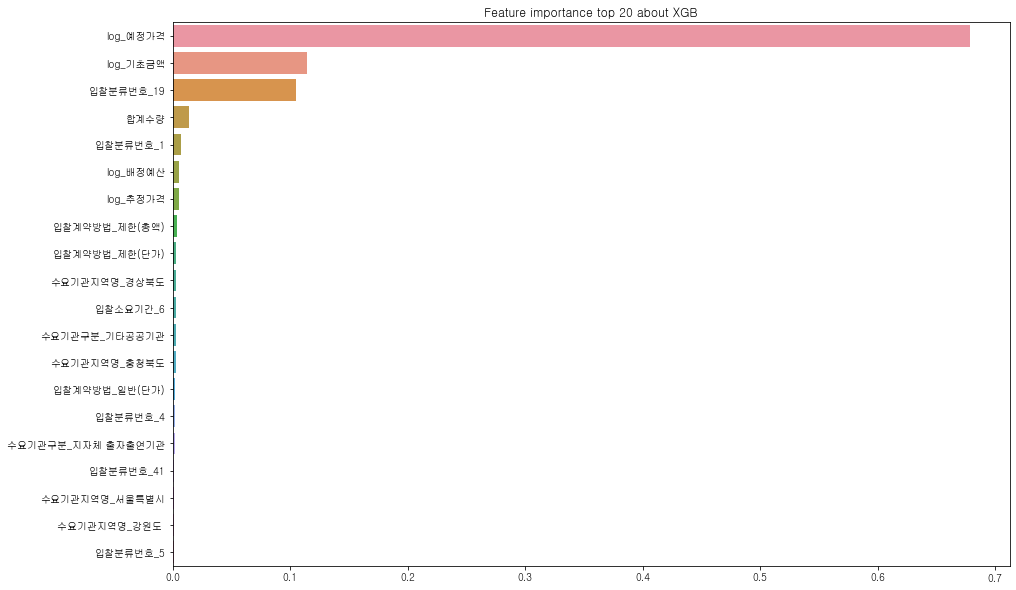

In [145]:
xgbmodel = xgboost.XGBRegressor(random_state=32)
xgbmodel.fit(X_train, y_train)

xgb_ft_importance_values = xgbmodel.feature_importances_

xgb_ft_series = pd.Series(xgb_ft_importance_values, index=X_train.columns)
ft_top20 = xgb_ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,10))
plt.title('Feature importance top 20 about XGB')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [146]:
ft_top20

log_예정가격            0.67831
log_기초금액            0.11431
입찰분류번호_19           0.10512
합계수량                0.01414
입찰분류번호_1            0.00683
log_배정예산            0.00540
log_추정가격            0.00517
입찰계약방법_제한(총액)       0.00335
입찰계약방법_제한(단가)       0.00303
수요기관지역명_경상북도        0.00303
입찰소요기간_6            0.00281
수요기관구분_기타공공기관       0.00275
수요기관지역명_충청북도        0.00270
입찰계약방법_일반(단가)       0.00185
입찰분류번호_4            0.00170
수요기관구분_지자체 출자출연기관   0.00170
입찰분류번호_41           0.00155
수요기관지역명_서울특별시       0.00150
수요기관지역명_강원도         0.00137
입찰분류번호_5            0.00123
dtype: float32

### RandomForest

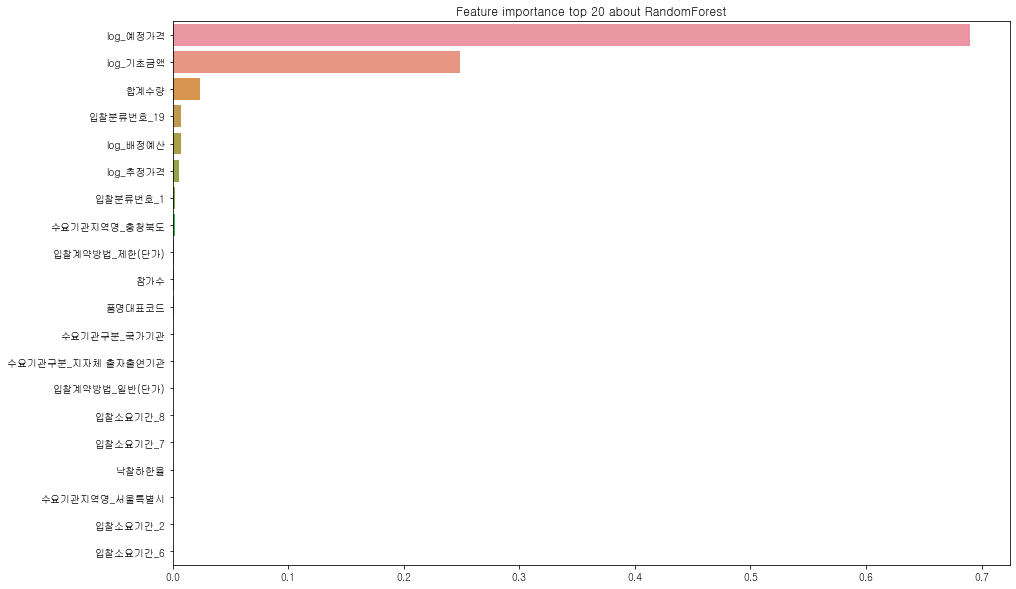

In [147]:
rfmodel = RandomForestRegressor(random_state=32)
rfmodel.fit(X_train, y_train)

rf_ft_importance_values = rfmodel.feature_importances_

rf_ft_series = pd.Series(rf_ft_importance_values, index=X_train.columns)
rf_ft_top20 = rf_ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,10))
plt.title('Feature importance top 20 about RandomForest')
sns.barplot(x=rf_ft_top20, y=rf_ft_top20.index)
plt.show()

In [148]:
rf_ft_top20

log_예정가격            0.68976
log_기초금액            0.24904
합계수량                0.02416
입찰분류번호_19           0.00731
log_배정예산            0.00730
log_추정가격            0.00555
입찰분류번호_1            0.00217
수요기관지역명_충청북도        0.00170
입찰계약방법_제한(단가)       0.00130
참가수                 0.00103
품명대표코드              0.00092
수요기관구분_국가기관         0.00069
수요기관구분_지자체 출자출연기관   0.00051
입찰계약방법_일반(단가)       0.00042
입찰소요기간_8            0.00039
입찰소요기간_7            0.00038
낙찰하한율               0.00032
수요기관지역명_서울특별시       0.00027
입찰소요기간_2            0.00022
입찰소요기간_6            0.00020
dtype: float64

### LightGBM

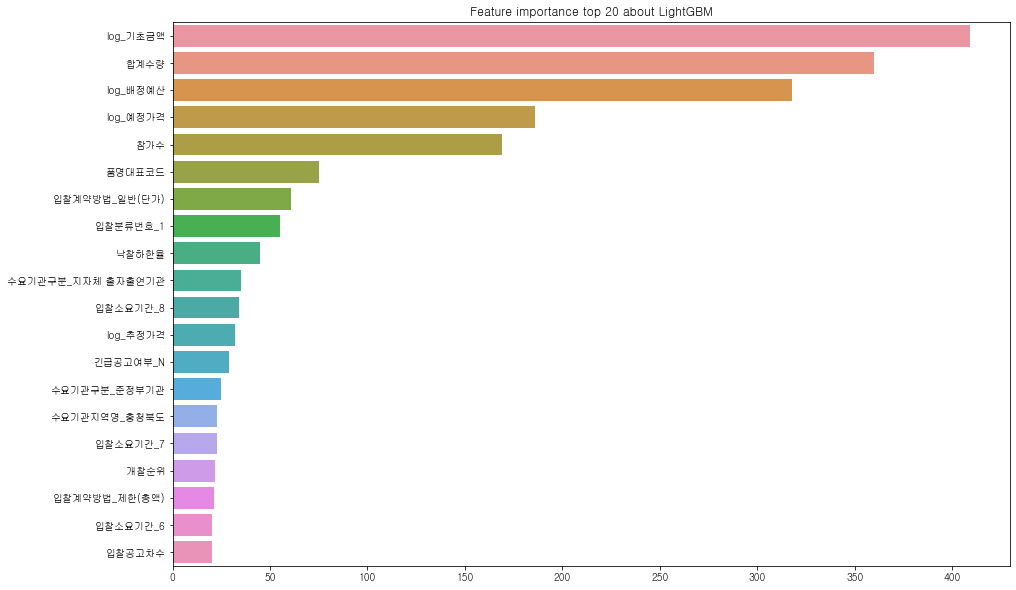

In [149]:
LGBMmodel = lightgbm.LGBMRegressor(random_state=32)
LGBMmodel.fit(X_train, y_train)

LGBM_ft_importance_values = LGBMmodel.feature_importances_

LGBM_ft_series = pd.Series(LGBM_ft_importance_values, index=X_train.columns)
LGBM_ft_top20 = LGBM_ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,10))
plt.title('Feature importance top 20 about LightGBM')
sns.barplot(x=LGBM_ft_top20, y=LGBM_ft_top20.index)
plt.show()

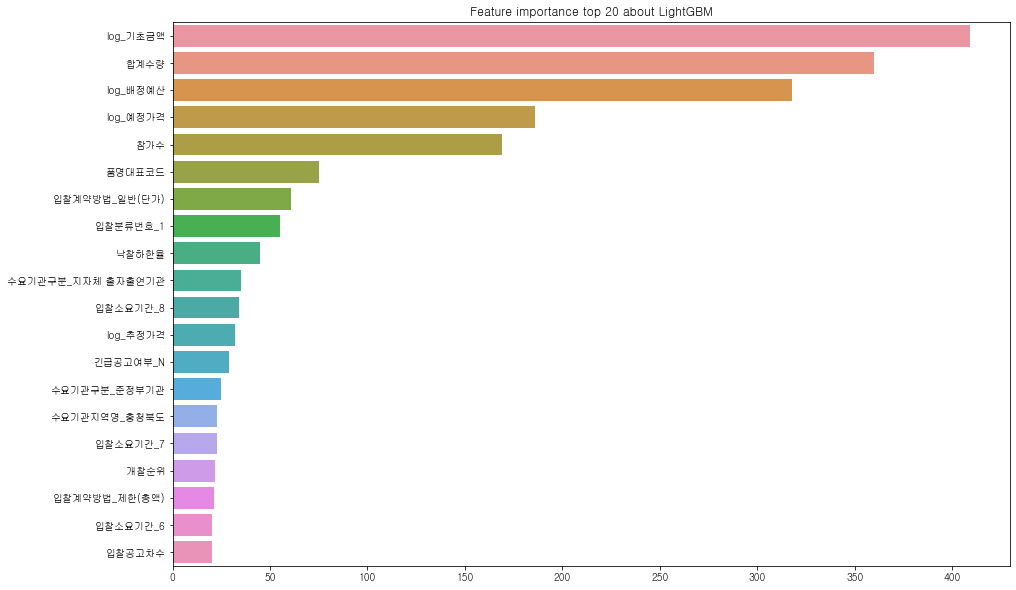

In [150]:
LGBMmodel2 = lightgbm.LGBMRegressor(learning_rate = 0.01, num_leaves = 33, objective = 'regression',
                             metric = 'rmse', task = 'predict', min_child_weight = 0.001,
                        max_depth = 17, min_child_samples = 8, random_state = 32, n_jobs=-1)

LGBMmodel2 = lightgbm.LGBMRegressor(random_state=32)
LGBMmodel2.fit(X_train, y_train)

LGBM_ft_importance_values = LGBMmodel2.feature_importances_

LGBM_ft_series = pd.Series(LGBM_ft_importance_values, index=X_train.columns)
LGBM_ft_top20 = LGBM_ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,10))
plt.title('Feature importance top 20 about LightGBM')
sns.barplot(x=LGBM_ft_top20, y=LGBM_ft_top20.index)
plt.show()

하이퍼 파라미터를 튜닝한 Model과 기본적인 Model에서의 feature importance는 큰 차이가 보이지 않았다.

In [151]:
LGBM_ft_top20

log_기초금액             409
합계수량                 360
log_배정예산             318
log_예정가격             186
참가수                  169
품명대표코드                75
입찰계약방법_일반(단가)         61
입찰분류번호_1              55
낙찰하한율                 45
수요기관구분_지자체 출자출연기관     35
입찰소요기간_8              34
log_추정가격              32
긴급공고여부_N              29
수요기관구분_준정부기관          25
수요기관지역명_충청북도          23
입찰소요기간_7              23
개찰순위                  22
입찰계약방법_제한(총액)         21
입찰소요기간_6              20
입찰공고차수                20
dtype: int32

세 가지 모델의 결과를 통합한 결과, 가격과 관련된 변수인 예정가격, 기초금액, 배정예산, 추정가격에 추가로 피쳐 중요도 상위 n개에서 교집합을 갖는 합계수량, 입찰계약방법, 참가수를 변수로 사용하기로 했다.


입찰분류번호와 수요기관지역명도 눈여겨 볼만한 변수이지만, 수요기관지역명에서는 충청북도만 교집합을 가지는 것으로 보아, 충청북도만의 어떠한 특징이 변수중요도의 오류를 불러왔다고 생각했다. 입찰분류번호는 1부터 300까지 대략 300여개의 변수가 존재하지만 그중 19와 1만 중요하다고 보여지는 것으로 보아, 사용한 데이터의 어떤 특성으로 인하여 1과 19의 중요도가 높다고 도출된 것으로 보여진다. 이는 다른 data set에 적용할 수 없는 문제이므로 입찰분류번호와 수요기관지역명은 배제한다.

따라서, 예정가격, 기초금액, 배정예산, 추정가격, 합계수량, 입찰계약방법, 참가수를 변수로 사용하기로 결정하였다.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124092 entries, 0 to 124091
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         124092 non-null  object 
 1   입찰공고차수       124092 non-null  int64  
 2   입찰분류번호       124092 non-null  int64  
 3   수요기관구분       124092 non-null  object 
 4   수요기관지역명      124092 non-null  object 
 5   긴급공고여부       124092 non-null  object 
 6   추정가격         124092 non-null  float64
 7   배정예산         124092 non-null  float64
 8   입찰방식         124092 non-null  object 
 9   기초금액         124092 non-null  float64
 10  예정가격         124092 non-null  float64
 11  참가수          124092 non-null  int64  
 12  개찰순위         124092 non-null  float64
 13  낙찰자결정방법      124092 non-null  object 
 14  입찰계약방법       124092 non-null  object 
 15  공동도급구성방식명    124092 non-null  object 
 16  낙찰하한율        124092 non-null  float64
 17  합계수량         124092 non-null  float64
 18  낙찰업체투찰금액     124092 non-

In [153]:
df[['예정가격', '기초금액', '배정예산', '추정가격', '참가수', '합계수량']].corr()

,예정가격,기초금액,배정예산,추정가격,참가수,합계수량
예정가격,1.00000,0.99998,-0.39298,-0.39298,0.05082,-0.03718
기초금액,0.99998,1.00000,-0.39349,-0.39349,0.05086,-0.03719
배정예산,-0.39298,-0.39349,1.00000,1.00000,-0.06569,-0.00245
추정가격,-0.39298,-0.39349,1.00000,1.00000,-0.06570,-0.00242
참가수,0.05082,0.05086,-0.06569,-0.06570,1.00000,0.26047
합계수량,-0.03718,-0.03719,-0.00245,-0.00242,0.26047,1.00000


In [188]:
df[['예정가격', '기초금액', '배정예산', '추정가격', '참가수', '합계수량', '낙찰업체투찰금액']].corr()

,예정가격,기초금액,배정예산,추정가격,참가수,합계수량,낙찰업체투찰금액
예정가격,1.00000,0.99998,-0.39298,-0.39298,0.05082,-0.03718,0.82605
기초금액,0.99998,1.00000,-0.39349,-0.39349,0.05086,-0.03719,0.82654
배정예산,-0.39298,-0.39349,1.00000,1.00000,-0.06569,-0.00245,-0.52588
추정가격,-0.39298,-0.39349,1.00000,1.00000,-0.06570,-0.00242,-0.52588
참가수,0.05082,0.05086,-0.06569,-0.06570,1.00000,0.26047,0.06823
합계수량,-0.03718,-0.03719,-0.00245,-0.00242,0.26047,1.00000,-0.04158
낙찰업체투찰금액,0.82605,0.82654,-0.52588,-0.52588,0.06823,-0.04158,1.00000


예정가격과 기초금액, 배정예산과 추정가격에서의 상관계수가 매우 높게(0.999~1) 측정이 되었다. 다중공선성의 문제가 제기될 수 있으므로 예정가격과 기초금액 중 하나의 변수를, 배정예산과 추정가격에서 하나의 변수를 선택하기로 하였으며, 최종적으로 기초금액과 배정예산을 선택하기로 하였다.

* 최종적인 모델링에 사용될 변수
* 독립변수 X: 낙찰자결정방법, 참가수, 합계수량, 기초금액, 배정예산
* 종속변수 Y: 낙찰업체투찰금액

# 3. 모델 선정

In [154]:
df_var = df[['기초금액', '배정예산', '참가수', '입찰계약방법','합계수량','낙찰업체투찰금액']]
df_var

,기초금액,배정예산,참가수,입찰계약방법,합계수량,낙찰업체투찰금액
0,17389840.00000,17389840.00000,9,수의(총액),1336.00000,15756760.00000
1,100000.00000,52519500.00000,4,지명(총액),1.00000,87620.00000
2,47283500.00000,47283500.00000,202,수의(총액),1.00000,42053320.00000
3,28793000.00000,28793000.00000,4,수의(총액),1.00000,27873600.00000
4,28644000.00000,28644000.00000,11,수의(총액),2.00000,28050000.00000
...,...,...,...,...,...,...
124087,26335980.00000,26335980.00000,6,수의(총액),1.00000,23166000.00000
124088,37102600.00000,37102600.00000,5,수의(총액),1.00000,33498300.00000
124089,19012000.00000,19400000.00000,142,수의(총액),1.00000,16758300.00000
124090,49773900.00000,49773900.00000,9,수의(총액),1.00000,43801000.00000


In [155]:
df_var['개당기초금액'] = df['기초금액'] / df['합계수량']
df_var['개당배정예산'] = df['배정예산'] / df['합계수량']
df_var['개당낙찰업체투찰금액'] = df['낙찰업체투찰금액'] / df['합계수량']

df_var

,기초금액,배정예산,참가수,입찰계약방법,합계수량,낙찰업체투찰금액,개당기초금액,개당배정예산,개당낙찰업체투찰금액
0,17389840.00000,17389840.00000,9,수의(총액),1336.00000,15756760.00000,13016.34731,13016.34731,11793.98204
1,100000.00000,52519500.00000,4,지명(총액),1.00000,87620.00000,100000.00000,52519500.00000,87620.00000
2,47283500.00000,47283500.00000,202,수의(총액),1.00000,42053320.00000,47283500.00000,47283500.00000,42053320.00000
3,28793000.00000,28793000.00000,4,수의(총액),1.00000,27873600.00000,28793000.00000,28793000.00000,27873600.00000
4,28644000.00000,28644000.00000,11,수의(총액),2.00000,28050000.00000,14322000.00000,14322000.00000,14025000.00000
...,...,...,...,...,...,...,...,...,...
124087,26335980.00000,26335980.00000,6,수의(총액),1.00000,23166000.00000,26335980.00000,26335980.00000,23166000.00000
124088,37102600.00000,37102600.00000,5,수의(총액),1.00000,33498300.00000,37102600.00000,37102600.00000,33498300.00000
124089,19012000.00000,19400000.00000,142,수의(총액),1.00000,16758300.00000,19012000.00000,19400000.00000,16758300.00000
124090,49773900.00000,49773900.00000,9,수의(총액),1.00000,43801000.00000,49773900.00000,49773900.00000,43801000.00000


이상치를 제거했지만, 그래도 여전히 가격이 편차가 심하므로 물품의 수량을 모두 1개로 통일하여 개당 가격을 계산하기로 결정했다.

In [156]:
df_var = df_var.drop(['기초금액', '배정예산', '합계수량', '낙찰업체투찰금액'], axis=1)

df_var

,참가수,입찰계약방법,개당기초금액,개당배정예산,개당낙찰업체투찰금액
0,9,수의(총액),13016.34731,13016.34731,11793.98204
1,4,지명(총액),100000.00000,52519500.00000,87620.00000
2,202,수의(총액),47283500.00000,47283500.00000,42053320.00000
3,4,수의(총액),28793000.00000,28793000.00000,27873600.00000
4,11,수의(총액),14322000.00000,14322000.00000,14025000.00000
...,...,...,...,...,...
124087,6,수의(총액),26335980.00000,26335980.00000,23166000.00000
124088,5,수의(총액),37102600.00000,37102600.00000,33498300.00000
124089,142,수의(총액),19012000.00000,19400000.00000,16758300.00000
124090,9,수의(총액),49773900.00000,49773900.00000,43801000.00000


In [157]:
df_var['log_개당배정예산'] = np.log1p(df_var['개당배정예산'])
df_var['log_개당기초금액'] = np.log1p(df_var['개당기초금액'])
df_var['log_개당낙찰업체투찰금액'] = np.log1p(df_var['개당낙찰업체투찰금액'])

df_var

,참가수,입찰계약방법,개당기초금액,개당배정예산,개당낙찰업체투찰금액,log_개당배정예산,log_개당기초금액,log_개당낙찰업체투찰금액
0,9,수의(총액),13016.34731,13016.34731,11793.98204,9.47404,9.47404,9.37543
1,4,지명(총액),100000.00000,52519500.00000,87620.00000,17.77670,11.51294,11.38078
2,202,수의(총액),47283500.00000,47283500.00000,42053320.00000,17.67167,17.67167,17.55445
3,4,수의(총액),28793000.00000,28793000.00000,27873600.00000,17.17564,17.17564,17.14319
4,11,수의(총액),14322000.00000,14322000.00000,14025000.00000,16.47731,16.47731,16.45635
...,...,...,...,...,...,...,...,...
124087,6,수의(총액),26335980.00000,26335980.00000,23166000.00000,17.08645,17.08645,16.95820
124088,5,수의(총액),37102600.00000,37102600.00000,33498300.00000,17.42920,17.42920,17.32701
124089,142,수의(총액),19012000.00000,19400000.00000,16758300.00000,16.78078,16.76058,16.63440
124090,9,수의(총액),49773900.00000,49773900.00000,43801000.00000,17.72300,17.72300,17.59517


In [158]:
newdf = pd.get_dummies(df_var)
newdf.head()

,참가수,개당기초금액,개당배정예산,개당낙찰업체투찰금액,log_개당배정예산,log_개당기초금액,log_개당낙찰업체투찰금액,입찰계약방법_수의(단가),입찰계약방법_수의(총액),입찰계약방법_일반(단가),입찰계약방법_일반(총액),입찰계약방법_제한(단가),입찰계약방법_제한(총액),입찰계약방법_지명(단가),입찰계약방법_지명(총액)
0,9,13016.34731,13016.34731,11793.98204,9.47404,9.47404,9.37543,0,1,0,0,0,0,0,0
1,4,100000.00000,52519500.00000,87620.00000,17.77670,11.51294,11.38078,0,0,0,0,0,0,0,1
2,202,47283500.00000,47283500.00000,42053320.00000,17.67167,17.67167,17.55445,0,1,0,0,0,0,0,0
3,4,28793000.00000,28793000.00000,27873600.00000,17.17564,17.17564,17.14319,0,1,0,0,0,0,0,0
4,11,14322000.00000,14322000.00000,14025000.00000,16.47731,16.47731,16.45635,0,1,0,0,0,0,0,0


In [159]:
X = newdf.drop(['개당기초금액', '개당배정예산', '개당낙찰업체투찰금액', 'log_개당낙찰업체투찰금액'], axis=1)
y = newdf['log_개당낙찰업체투찰금액']

newdf_xy = pd.concat([X, y], axis=1)
newdf_xy

,참가수,log_개당배정예산,log_개당기초금액,입찰계약방법_수의(단가),입찰계약방법_수의(총액),입찰계약방법_일반(단가),입찰계약방법_일반(총액),입찰계약방법_제한(단가),입찰계약방법_제한(총액),입찰계약방법_지명(단가),입찰계약방법_지명(총액),log_개당낙찰업체투찰금액
0,9,9.47404,9.47404,0,1,0,0,0,0,0,0,9.37543
1,4,17.77670,11.51294,0,0,0,0,0,0,0,1,11.38078
2,202,17.67167,17.67167,0,1,0,0,0,0,0,0,17.55445
3,4,17.17564,17.17564,0,1,0,0,0,0,0,0,17.14319
4,11,16.47731,16.47731,0,1,0,0,0,0,0,0,16.45635
...,...,...,...,...,...,...,...,...,...,...,...,...
124087,6,17.08645,17.08645,0,1,0,0,0,0,0,0,16.95820
124088,5,17.42920,17.42920,0,1,0,0,0,0,0,0,17.32701
124089,142,16.78078,16.76058,0,1,0,0,0,0,0,0,16.63440
124090,9,17.72300,17.72300,0,1,0,0,0,0,0,0,17.59517


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (86864, 11)
y train shape:  (86864,)
X test shape:  (37228, 11)
y test shape:  (37228,)


# 3-1. AutoML

AutoML 모듈을 사용하여, 상위 n가지의 기법(모델)들을 뽑아내고 그 기법들을 사용하여서 AutoML에서 추천해준 hyper-parameter와, 우리 팀이 GridSearchCV모듈을 사용하여 찾은 최적의 하이퍼 파라미터를 비교하고 더 나은 성능을 보이는 파라미터를 사용하여 모델에 적용하기로 결정했다.

In [161]:
import pycaret 
pycaret.__version__

'2.3.6'

In [162]:
from pycaret.regression import *

In [163]:
reg = setup(newdf_xy, target='log_개당낙찰업체투찰금액', train_size = 0.7) 

,Description,Value
0,session_id,1448
1,Target,log_개당낙찰업체투찰금액
2,Original Data,"(124092, 12)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(86864, 11)"


In [164]:
best = compare_models(sort = 'RMSE') 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.8115,1.2059,1.0981,0.9563,0.3019,12.1977,8.9280
lightgbm,Light Gradient Boosting Machine,0.8115,1.2063,1.0983,0.9563,0.3019,5.3550,0.5970
xgboost,Extreme Gradient Boosting,0.8114,1.2133,1.1014,0.9560,0.3023,2.8103,2.6790
rf,Random Forest Regressor,0.8102,1.2236,1.1061,0.9557,0.3030,0.9900,6.9880
et,Extra Trees Regressor,0.8100,1.2252,1.1068,0.9556,0.3030,1.9327,4.7170
dt,Decision Tree Regressor,0.8120,1.2294,1.1087,0.9554,0.3031,0.9716,0.1260
gbr,Gradient Boosting Regressor,0.8337,1.2515,1.1186,0.9546,0.3045,65.7771,2.8600
knn,K Neighbors Regressor,0.8996,1.5842,1.2585,0.9426,0.3309,41.1865,0.9900
ada,AdaBoost Regressor,1.1353,1.9981,1.4111,0.9275,0.3926,138.2355,2.3130
br,Bayesian Ridge,1.1058,2.1031,1.4501,0.9238,0.3803,58.9942,0.0870


우리가 적용하려는 모델은 Regression이므로 sort의 기준은 RMSE로 결정했다. (F1, precision 등을 사용하지 않은 이유)

상위 5개의 결정계수를 가지는 모델 중, Catboost를 사용하기에는 Categorical 변수들의 개수가 너무 적어서 제외하고(Catboost는 categorical 변수가 많을때 좋은 성능을 보임), RF와 ET중 mse, rmse mape부분에서 rf가 더 우세를 보이므로 LightGBM, XGBoost, RandomForest를 사용한다.

In [165]:
auto_lgbm = create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8178,1.2311,1.1096,0.9551,0.3028,10.7540
1,0.8147,1.2181,1.1037,0.9565,0.3044,3.1693
2,0.8152,1.2101,1.1001,0.9559,0.3020,4.5033
3,0.8027,1.1761,1.0845,0.9575,0.2998,1.3614
4,0.8099,1.2015,1.0961,0.9563,0.3009,4.9559
Mean,0.8121,1.2074,1.0988,0.9563,0.3020,4.9488
SD,0.0053,0.0185,0.0084,0.0008,0.0016,3.1602


In [166]:
print(auto_lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1448, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [167]:
auto_xgb = create_model('xgboost', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8167,1.2376,1.1125,0.9548,0.3032,3.2835
1,0.8152,1.2255,1.1070,0.9562,0.3046,3.4652
2,0.8158,1.2227,1.1058,0.9555,0.3026,2.4634
3,0.8029,1.1817,1.0870,0.9573,0.3003,1.1374
4,0.8091,1.2049,1.0977,0.9562,0.3013,3.1372
Mean,0.8119,1.2145,1.1020,0.9560,0.3024,2.6973
SD,0.0053,0.0195,0.0088,0.0008,0.0015,0.8503


In [168]:
print(auto_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1448, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


In [169]:
auto_rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8154,1.2489,1.1175,0.9544,0.3039,0.8714
1,0.8146,1.2360,1.1118,0.9558,0.3053,1.1448
2,0.8159,1.2370,1.1122,0.9549,0.3035,0.9529
3,0.8024,1.1942,1.0928,0.9568,0.3011,0.8528
4,0.8071,1.2137,1.1017,0.9559,0.3020,1.0982
Mean,0.8111,1.2260,1.1072,0.9556,0.3032,0.9840
SD,0.0054,0.0195,0.0088,0.0008,0.0015,0.1181


In [170]:
print(auto_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1448, verbose=0, warm_start=False)


## 3-2. LightGBM

In [171]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [172]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

GridSearchCV 모듈을 사용하는데 긴 시간이 걸려서 검증 ipynb에 삽입하지는 못했지만, LightGBM에서 최고의 성능을 띄는 (튜닝이 된) parameter를 삽입하여 AutoML의 결과와 비교해보았다.

* GridSearchCV 모듈을 사용하여 도출한 파라미터를 삽입한 다양한 평가 지표의 결과

In [218]:
lgbm_model = lgb.LGBMRegressor(learning_rate = 0.01, num_leaves = 33, objective = 'regression',
                             metric = 'rmse', task = 'predict', min_child_weight = 0.001,
                        max_depth = 17, min_child_samples = 8, random_state = 32, n_jobs=-1)

lgbm_model.fit(X_train, y_train)

lgbm_preds = lgbm_model.predict(X_test)

lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_preds))
print('RMSE: %f' % (lgbm2_rmse))

print('MSE : ', np.square(np.subtract(y_test, lgbm_preds)).mean())
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(lgbm_preds))))))

print('결정계수 : %f ' % (r2_score(y_test, lgbm_preds)))
print('adjusted R2 Score : ', 1-(1-r2_score(y_test, lgbm_preds)) * (len(y_test)-1) / (len(y_test) - len(X.columns) - 1))

score = lgbm_model.score(X_train, y_train)  
print("Training score: ", score)

scores = cross_val_score(lgbm_model, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

RMSE: 1.089277
MSE :  4.788625349119262
RMSLE :  0.4510104371947005
결정계수 : 0.827041 
adjusted R2 Score :  0.8269901506007175
Training score:  0.8267299137749979
Mean cross-validation score: 0.83
K-fold CV average score: 0.83


* AutoML에서 도출된 파라미터를 삽입한 다양한 평가 지표의 결과

In [217]:
lgbm_model2 = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7525, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgbm_model2.fit(X_train, y_train)

lgbm2_preds = lgbm_model2.predict(X_test)

lgbm2_rmse = np.sqrt(mean_squared_error(y_test, lgbm2_preds))
print('RMSE: %f' % (lgbm2_rmse))

print('MSE : ', np.square(np.subtract(y_test, lgbm2_preds)).mean())
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(lgbm2_preds))))))

print('결정계수 : %f ' % (r2_score(y_test, lgbm2_preds)))
print('adjusted R2 Score : ', 1-(1-r2_score(y_test, lgbm2_preds)) * (len(y_test)-1) / (len(y_test) - len(X.columns) - 1))

score = lgbm_model2.score(X_train, y_train)  
print("Training score: ", score)

scores = cross_val_score(lgbm_model2, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lgbm_model2, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

RMSE: 1.089277
MSE :  1.1865235865846147
RMSLE :  0.3003355638049664
결정계수 : 0.957144 
adjusted R2 Score :  0.9571316918619551
Training score:  0.9566128927324494
Mean cross-validation score: 0.96
K-fold CV average score: 0.96


다양한 평가지표에서 AutoML에서 내준 파라미터를 삽입하여 모델링하는 것이 더 좋은 성능을 보였다. 따라서, LightGBM과 XGBoost도 AutoML 추천 파라미터를 사용하여 모델을 완성하기로 결정하였다.

In [175]:
lgbm_check = pd.DataFrame({'log_낙찰업체투찰금액' : y_test,
              'log_낙찰업체투찰금액_lgbm_pre' : lgbm2_preds})

lgbm_check['낙찰업체투찰금액'] = np.expm1(lgbm_check['log_낙찰업체투찰금액'])
lgbm_check['낙찰업체투찰금액_lgbm_pre'] = np.expm1(lgbm_check['log_낙찰업체투찰금액_lgbm_pre'])

lgbm_check

,log_낙찰업체투찰금액,log_낙찰업체투찰금액_lgbm_pre,낙찰업체투찰금액,낙찰업체투찰금액_lgbm_pre
117846,7.82318,11.20283,2496.82540,73337.04411
93627,4.51321,2.77866,90.21445,15.09743
88506,1.93634,2.78168,5.93335,15.14607
22912,13.38344,13.81019,649160.00000,994689.91249
42982,2.20970,2.77321,8.11300,15.00999
...,...,...,...,...
10443,2.06737,2.79049,6.90397,15.28902
107213,3.96738,2.76281,51.84595,14.84437
110553,0.00200,0.00394,0.00200,0.00395
52652,1.59387,2.78693,3.92275,15.23117


In [210]:
print('RMSE : ', np.sqrt(mean_squared_error(lgbm_check['낙찰업체투찰금액'], lgbm_check['낙찰업체투찰금액_lgbm_pre'])))
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(lgbm_check['낙찰업체투찰금액']) - np.log1p(lgbm_check['낙찰업체투찰금액_lgbm_pre']))))) )

RMSE :  395386.4426943259
RMSLE :  1.0892766345536906


## 3-3. XGBoost

In [177]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [216]:
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, 
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=7525, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print('RMSE: %f' % (xgb_rmse))

print('MSE : ', np.square(np.subtract(y_test, xgb_preds)).mean())
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(xgb_preds))))))

print('R2 Score : %f' % (r2_score(y_test, xgb_preds)))
print('adjusted R2 Score : ', 1-(1-r2_score(y_test, xgb_preds)) * (len(y_test)-1) / (len(y_test) - len(X.columns) - 1))

score = xgb_model.score(X_train, y_train)  
print("Training score: ", score)

RMSE: 1.093910
MSE :  1.196638599246654
RMSLE :  0.30088235129589824
R2 Score : 0.956779
adjusted R2 Score :  0.9567662431810191
Training score:  0.9570786680388699


In [179]:
xgb_check = pd.DataFrame({'log_낙찰업체투찰금액' : y_test,
              'log_낙찰업체투찰금액_xgb_pre' : xgb_preds})

xgb_check['낙찰업체투찰금액'] = np.expm1(xgb_check['log_낙찰업체투찰금액'])
xgb_check['낙찰업체투찰금액_xgb_pre'] = np.expm1(xgb_check['log_낙찰업체투찰금액_xgb_pre'])

xgb_check

,log_낙찰업체투찰금액,log_낙찰업체투찰금액_xgb_pre,낙찰업체투찰금액,낙찰업체투찰금액_xgb_pre
117846,7.82318,11.22360,2496.82540,74875.80469
93627,4.51321,2.78405,90.21445,15.18436
88506,1.93634,2.78052,5.93335,15.12748
22912,13.38344,13.96556,649160.00000,1161892.87500
42982,2.20970,2.73934,8.11300,14.47676
...,...,...,...,...
10443,2.06737,2.82778,6.90397,15.90788
107213,3.96738,2.74954,51.84595,14.63547
110553,0.00200,0.00244,0.00200,0.00244
52652,1.59387,2.77181,3.92275,14.98755


In [209]:
print('RMSE : ', np.sqrt(mean_squared_error(xgb_check['낙찰업체투찰금액'], xgb_check['낙찰업체투찰금액_xgb_pre'])))
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(xgb_check['낙찰업체투찰금액']) - np.log1p(xgb_check['낙찰업체투찰금액_xgb_pre']))))) )

RMSE :  357042.13960260595
RMSLE :  1.0939097765547363


## 3-4. RandomForest

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7525, verbose=0, warm_start=False)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print('RMSE: %f' % (rf_rmse))

print('MSE : ', np.square(np.subtract(y_test, rf_preds)).mean())
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(rf_preds))))))

print('R2 Score : %f' % (r2_score(y_test, rf_preds)))
print('adjusted R2 Score : ', 1-(1-r2_score(y_test, rf_preds)) * (len(y_test)-1) / (len(y_test) - len(X.columns) - 1))

score = rf_model.score(X_train, y_train)  
print("Training score: ", score)

RMSE: 1.098129
MSE :  1.205887748989642
RMSLE :  0.3014855461480537
R2 Score : 0.956445
adjusted R2 Score :  0.9564320775515452
Training score:  0.9571901304047109


In [183]:
rf_check = pd.DataFrame({'log_낙찰업체투찰금액' : y_test,
              'log_낙찰업체투찰금액_rf_pre' : rf_preds})

rf_check['낙찰업체투찰금액'] = np.expm1(rf_check['log_낙찰업체투찰금액'])
rf_check['낙찰업체투찰금액_rf_pre'] = np.expm1(rf_check['log_낙찰업체투찰금액_rf_pre'])
rf_check

,log_낙찰업체투찰금액,log_낙찰업체투찰금액_rf_pre,낙찰업체투찰금액,낙찰업체투찰금액_rf_pre
117846,7.82318,11.28370,2496.82540,79513.98844
93627,4.51321,2.77836,90.21445,15.09265
88506,1.93634,2.80517,5.93335,15.52995
22912,13.38344,13.83409,649160.00000,1018748.12927
42982,2.20970,2.74436,8.11300,14.55468
...,...,...,...,...
10443,2.06737,2.83435,6.90397,16.01936
107213,3.96738,2.74287,51.84595,14.53146
110553,0.00200,0.00208,0.00200,0.00209
52652,1.59387,2.77186,3.92275,14.98833


In [207]:
print('RMSE : ', np.sqrt(mean_squared_error(rf_check['낙찰업체투찰금액'], rf_check['낙찰업체투찰금액_rf_pre'])))
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(rf_check['낙찰업체투찰금액']) - np.log1p(rf_check['낙찰업체투찰금액_rf_pre']))))) )

RMSE :  382373.1489003217
RMSLE :  1.0981292041420454


## 3-5. 세 가지 모델의 평균을 내 final model 형성

In [185]:
final_check = pd.DataFrame({'log_개당낙찰업체투찰금액' : y_test,
              'log_개당낙찰업체투찰금액_pre' : ((rf_preds + xgb_preds + lgbm2_preds) / 3)})

final_check['개당낙찰업체투찰금액'] = np.expm1(final_check['log_개당낙찰업체투찰금액'])
final_check['개당낙찰업체투찰금액_pre'] = np.expm1(final_check['log_개당낙찰업체투찰금액_pre'])

final_check

,log_개당낙찰업체투찰금액,log_개당낙찰업체투찰금액_pre,개당낙찰업체투찰금액,개당낙찰업체투찰금액_pre
117846,7.82318,11.23671,2496.82540,75864.07210
93627,4.51321,2.78036,90.21445,15.12476
88506,1.93634,2.78913,5.93335,15.26678
22912,13.38344,13.86995,649160.00000,1055942.34818
42982,2.20970,2.75230,8.11300,14.67872
...,...,...,...,...
10443,2.06737,2.81754,6.90397,15.73564
107213,3.96738,2.75174,51.84595,14.66989
110553,0.00200,0.00282,0.00200,0.00282
52652,1.59387,2.77687,3.92275,15.06861


In [205]:
print('RMSE : ', np.sqrt(mean_squared_error(final_check['개당낙찰업체투찰금액'], final_check['개당낙찰업체투찰금액_pre'])))
print('RMSLE : ', (np.sqrt(np.mean(np.square(np.log1p(final_check['개당낙찰업체투찰금액']) - np.log1p(final_check['개당낙찰업체투찰금액_pre']))))) )

RMSE :  345382.00571013865
RMSLE :  1.0916282638999881


3가지의 모델을 합쳤을 때 가장 좋은 성능을 보임을 확인할 수 있었다.